# CAPSTONE PROJECT                                                             

# Sifa TOK

----

## Introduction


Social interaction plays a key role in maintaining mental health. 
increased isolation has a devastating impact on mental health, leading to a slower functioning society. Research shows that social isolation is twice as harmful to physical and mental health when compared to obesity. Other studies have linked anxiety to a 30% increase in risk and development of coronary heart disease and to a 40% increase in risk of dementia. 
After COVID-19, mental health has been a paramount issue, as quarantine has increased the social isolation many British already faced. A research conducted in late March show that over a third (36%) of British say the coronavirus has had a serious impact on mental health.



The overall aim of this project is building an NLP based application to identify how our sentiments changed during Coronavirus lock down, what affected the most and up to what degree the change in death rates are effecting our sentiments, in particular negative sentiment. In other words, project aimed at evaluating Covid-19 lock down period in terms of change in sentiments and helping to identify patterns, trends and public awareness levels related public mental health.



In today's world, social media platforms like twitter are of immense importance to people's everyday lives. We definitely have to deal with the manifestations on these platforms, and as machine learning becomes more and more popular and important just like the natural language processing (NLP), we have to deal with this, and analyse and research the emotions on this platforms.

## Data

A sample of tweets between 01 January 2020 and 06 June 2021 that contains coronavirus and UK as keywords are imported for sentiment analysis with cleaned version with no retweets on the "full_dataset-clean.tsv" (252,342,227 unique tweets). 

To create a custom language model around 2000 tweets labelled manually and accepted as grand truth. Later on the remaining tweet data is labelled through the Spacy language model and used as data for machine learning classifiers.

Official coronavirus figures announced daily by the UK Government are used for time series analysis.

And also I used the Google Trends API to gather the data to estimate the impact of lockdown on well-being related searches, and then analyze it with python. I selected the data from Google Trends between June 1st 2019 and JUne 10th 2021 in Uk.


## Methodology
-----

For sentiment analysis:

    - Vader Sentiment Analyser

    - Spacy Text Classification Model

For time series analysis:

    - SARIMA time series model
    
For machine learning modelling:

    - Decision Tree classifier

    - Random Forest classifier

are used.

Recall, accuracy and f1 scores are used for evaluation metrics.

## Time Series Analysis
-----

For time series analysis, the data between 02 March 2020 - 01 June 2021 inspected for stationarity. The p-value was found to be higher than 0.05. Therefore, some methods are used to stationarize the data.

In order to find the optimal p, d, q values with the lowest AIC value for SARIMA model a grid search conducted.

## Google Trends Data
----

I used the Google Trends API to gather the data to estimate the impact of lockdown on well-being related searches, and then analyze it with python. I selected the data from Google Trends between June 1st 2019 and JUne 10th 2021 in Uk.

The keywords we will use are "violence", "divorce" ,"suicide","stress" and "anxiety". These words should encompass the majority of depressive attitudes. Note, other words could definitely be used, and the results would thus most likely change. This would be an area of future study.

The WHO further reports that:


    -In the last 45 years suicide rates have increased by 60% worldwide

    -Mental health disorders (particularly depression and substance abuse) are associated with more than 90% of all cases of suicide.

    -However, suicide results from many complex sociocultural factors and is more likely to occur during periods of socioeconomic, family and individual crisis (e.g. loss of a loved one, unemployment, sexual orientation, difficulties with developing one's identity, disassociation from one's community or other social/belief group, and honour).

Our findings will indicate that how people’s mental health may have been severely affected by the pandemic and lockdown. 

## Sentiment Analysis:
-----

The tweet data cleaned by removing punctuations, emojis, symbols, flags, pictographs and etc. in order to prevent any type of errors during modelling with VADER Sentiment Analyser. The polarity scores positive, negative, neutral and compound are added to the tweet dataframe as separate columns. As the Vader Sentiment analyser calculates the four scores for each sentence, the compound scores are grouped as -1(negative) if the compound scores as below - 0.05, 1(positive) if they are above 0.05, scores between labelled as 0(neutral).

To further analyse the change in sentiments and compare with the Vader Analyzer's results with a custom model, a pre-trained language model Spacy text classification is chosen. This language model makes custom text classification structured and convenient through the textcat component. One significant reason why spaCy is preferred a lot is that it allows to easily build or extend a text classification model.

To create a custom language model initially 2000 tweets labelled manually. It is important to note that the tweets about Covid-19 are highly negative and at some points it is difficult to distinct between neutral and negative ones. At first attempt to build the language model, only 0.57 accuracy achieved due to class imbalance. In order to overcome class imbalance applied text augmentation to improve model performance without manual effort.

The custom model achieved 77% accuracy.


## Machine Learning Classifiers
-----

In order to explore how the change in death rates affected our sentiments, in particular negative sentiments, DecisionTree, RandomForest Classifiers are used.


Among the trained machine learning models with 80% accuracy, RandomForest classifier reached the highest accuracy, while DEcisionTree with further tuning reached 73%.

The small dataset is a limitation for powerful and more complex machine learning models and result are biased due to insufficient learning.
It is important to note that the model benefited from death and shifted death rates predicting the sentiments.

# Covid Death Data

In [1]:
# Import necessary libraries;

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
plt.rcParams['figure.figsize'] = [20, 10]
import plotly.express as px
from collections import Counter
import operator
sns.set_palette('Set2')
sns.set_style('darkgrid')
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
np.random.seed(42)
plt.style.use('ggplot')


In [2]:
covid= pd.read_csv("data_2021-Jun-02.csv")
covid.head()

,areaType,areaName,areaCode,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
0,overview,United Kingdom,K02000001,2021-06-01,2,127794
1,overview,United Kingdom,K02000001,2021-05-31,3,127792
2,overview,United Kingdom,K02000001,2021-05-30,4,127789
3,overview,United Kingdom,K02000001,2021-05-29,3,127785
4,overview,United Kingdom,K02000001,2021-05-28,4,127782


In [3]:
# checking null values;
covid.isnull().sum()

areaType                      0
areaName                      0
areaCode                      0
date                          0
newDeaths28DaysByDeathDate    0
cumDeaths28DaysByDeathDate    0
dtype: int64

In [4]:
# converting date to datetime;
covid['Date'] = pd.to_datetime(covid['date'], errors='coerce')
covid['Date'].dtype

dtype('<M8[ns]')

In [5]:
covid.sort_values(by=['Date'], inplace=True, ascending=True)
covid.head()

,areaType,areaName,areaCode,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,Date
456,overview,United Kingdom,K02000001,2020-03-02,1,1,2020-03-02
455,overview,United Kingdom,K02000001,2020-03-03,2,3,2020-03-03
454,overview,United Kingdom,K02000001,2020-03-04,0,3,2020-03-04
453,overview,United Kingdom,K02000001,2020-03-05,3,6,2020-03-05
452,overview,United Kingdom,K02000001,2020-03-06,0,6,2020-03-06


In [6]:
# changing column names to make easier analysing;
df_covid=covid.rename(columns={'areaName':'Country','newDeaths28DaysByDeathDate':'covid_deaths'})

df=df_covid[['Date','Country', 'covid_deaths']].set_index('Date')

df.head()

,Country,covid_deaths
Date,,
2020-03-02,United Kingdom,1
2020-03-03,United Kingdom,2
2020-03-04,United Kingdom,0
2020-03-05,United Kingdom,3
2020-03-06,United Kingdom,0


## Time Series

In [7]:
series= df.loc[df['Country']=='United Kingdom']
series.drop(['Country'], axis=1, inplace=True)
series.head()

,covid_deaths
Date,
2020-03-02,1
2020-03-03,2
2020-03-04,0
2020-03-05,3
2020-03-06,0


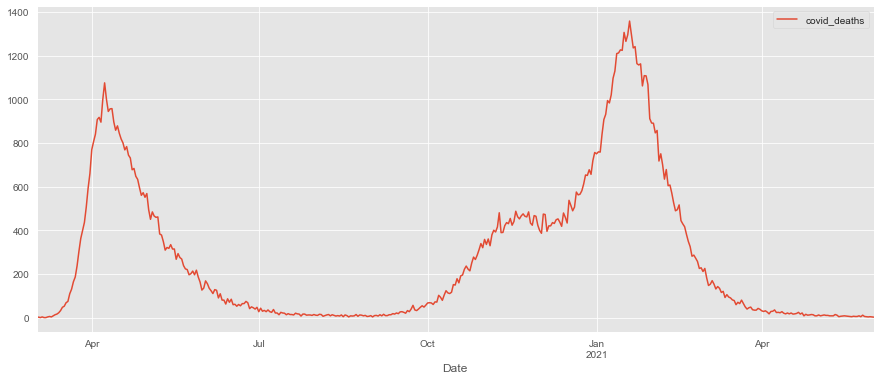

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
series.plot(figsize=(15, 6))
plt.show()

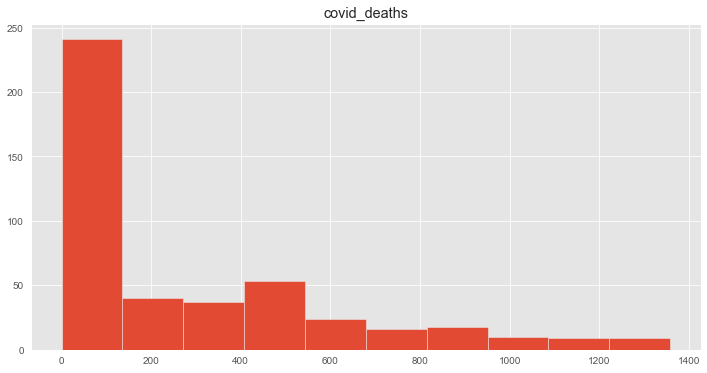

In [9]:
series.hist(figsize = (12,6))
plt.show()

The plot shows a distribution that doesn't exactly look Gaussian/Normal. The plotting function automatically selected the size of the bins based on the spread of values in the data here.

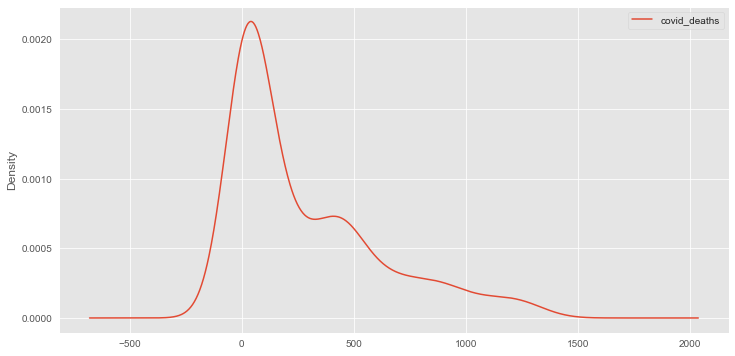

In [13]:
series.plot(kind='kde', figsize = (12,6))
plt.show()

A histogram groups values into bins, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.

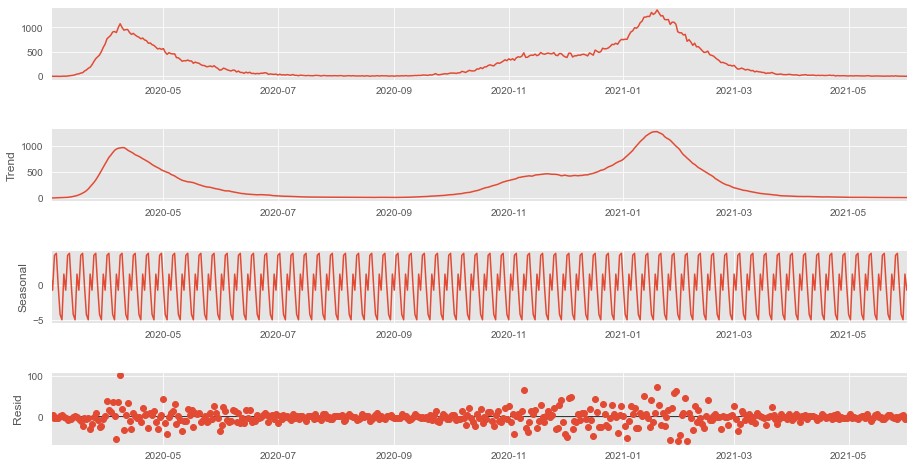

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = sm.tsa.seasonal_decompose(series, model='additive',extrapolate_trend='freq')
fig = result.plot()
fig.set_size_inches(14,7)
plt.show()

### Chacking stationary and trends

In [17]:
def stationarity_check(data):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = data.rolling(window=8, center=False).mean()
    roll_std = data.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(data)
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(data, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

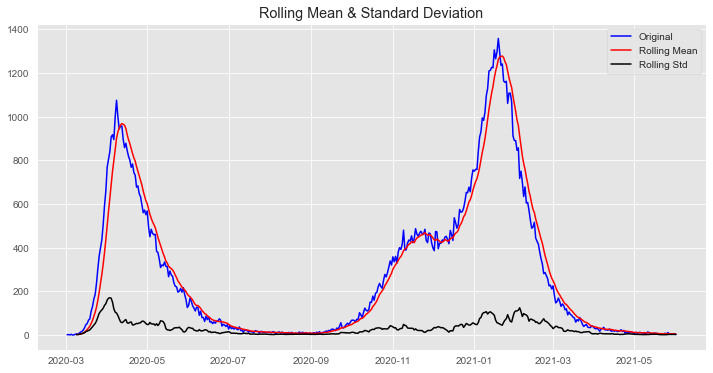

Results of Dickey-Fuller Test: 

Test Statistic                  -2.307435
p-value                          0.169581
#Lags Used                      13.000000
Number of Observations Used    443.000000
Critical Value (1%)             -3.445198
Critical Value (5%)             -2.868086
Critical Value (10%)            -2.570257
dtype: float64


In [18]:
stationarity_check(series)

The red and black lines represent the rolling mean and rolling standard deviations. You can see that the mean is not constant over time, so we can reconfirm our conclusion that the time series is not stationary based on rolling mean and rolling standard error.

For a time series model to be stationary, properties of the time-series shouldn't not depend on the time at which the series is observed. One of the indicators of stationarity is low p-value. If the p-value is lower than 0.05, it can be concluded that the series is stationary.

In our model, the p-value is higher than 0.05 so the time series is not stationary!.

In [19]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(series)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(-2.307434966329036, 0.16958125858514556, 13, 443, {'1%': -3.4451978474132234, '5%': -2.8680864144212057, '10%': -2.5702569996789792}, 4076.4265669374563)


In [20]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -2.307435
p-value                          0.169581
#Lags Used                      13.000000
Number of Observations Used    443.000000
Critical Value (1%)             -3.445198
Critical Value (5%)             -2.868086
Critical Value (10%)            -2.570257
dtype: float64


The Dickey-Fuller test is a statistical test for testing stationarity. The null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary. 

A nice print-out of the Dickey-Fuller test can be found below. The p-value is 1 here, so the time series is not stationary!

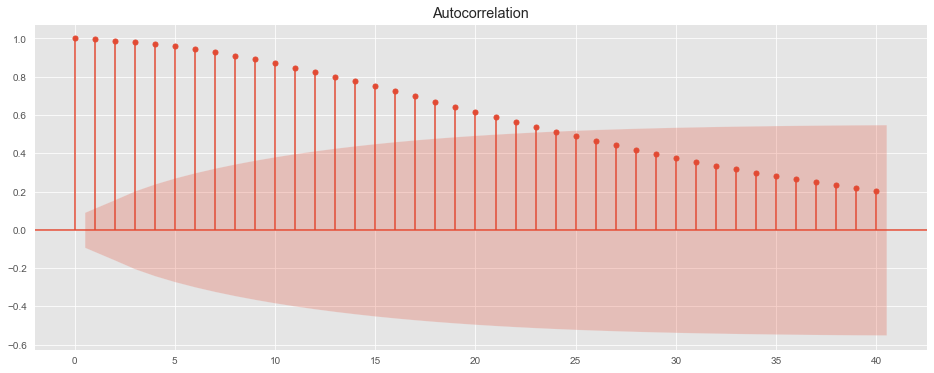

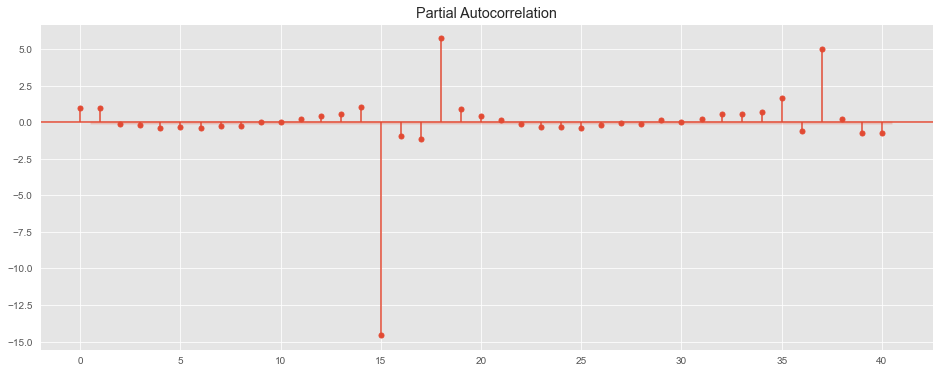

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,6))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,6))
plot_pacf(series, ax=ax, lags=40);

# diff haliyle autocorr bak

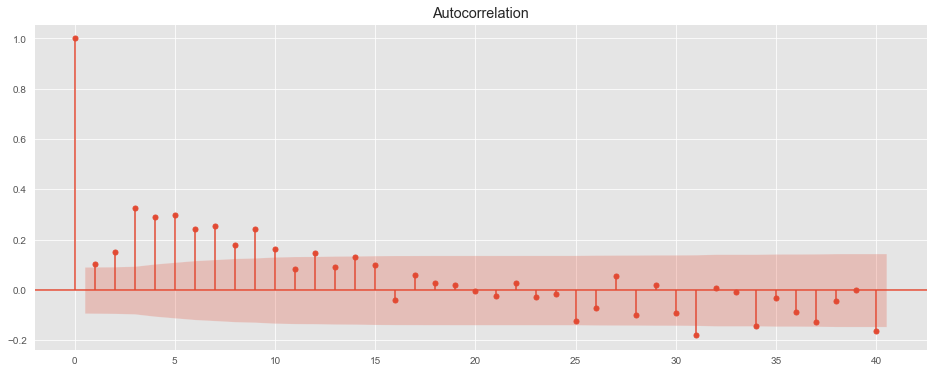

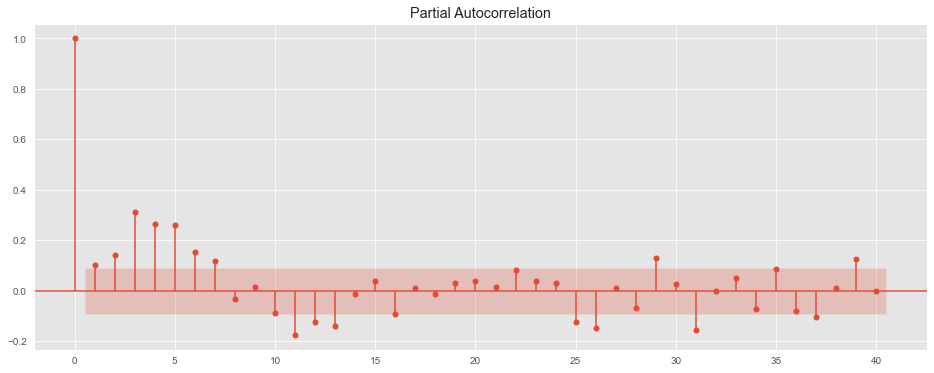

In [25]:
# checking with using differencing;

fig, ax = plt.subplots(figsize=(16,6))
plot_acf(series.diff().dropna(), ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,6))
plot_pacf(series.diff().dropna(), ax=ax, lags=40);

### Grid search

In [37]:
import pmdarima as pm
import datetime as dt

#Create auto_arima model
pm_model = pm.auto_arima(series,
                    trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                        seasonal=True, m=7)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=4230.912, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4375.810, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4350.070, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4355.059, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4373.810, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=4229.981, Time=0.97 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=4228.040, Time=0.59 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=4229.971, Time=0.74 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=4265.241, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=4294.668, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[7] intercept   : AIC=4228.219, Time=0.50 sec
 ARIMA(2,1,3)(0,0,0)[7] intercept   : AIC=4227.114, Time=0.43 sec
 ARIMA(2,1,3)(1,0,0)[7] intercept   : AIC=4228.632, Time=0.70 sec
 ARIMA(2,1,3)(0,0,1)[7] intercept   : AIC=4228.685, Time=0.60 sec
 ARIMA(2,1,3)(1,0,1)[7] intercept

This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

The above output suggests that ARIMAX(1, 1, 3)x(0, 0, 0, 7) yields the lowest AIC value of 4226.414 Therefore we should consider this to be optimal option.

## Fitting the ARIMA model

In [38]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(series, 
                                        order=(1, 1, 3), 
                                        seasonal_order=(0, 0, 0, 7),
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9285      0.013     69.290      0.000       0.902       0.955
ma.L1         -1.1399      0.031    -36.363      0.000      -1.201      -1.078
ma.L2          0.1082      0.050      2.145      0.032       0.009       0.207
ma.L3          0.3158      0.032     10.009      0.000       0.254       0.378
sigma2       607.3754     24.731     24.559      0.000     558.904     655.847


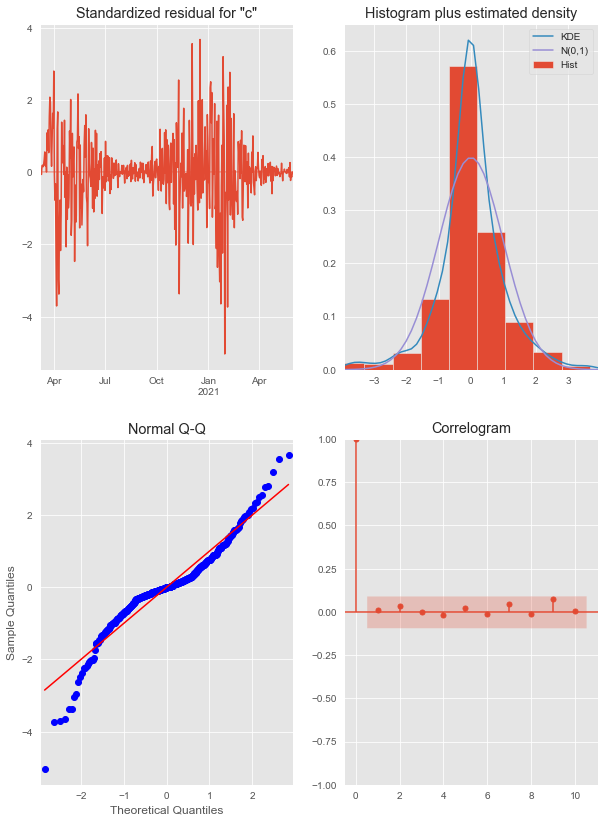

In [39]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(10, 14))
plt.show()

KDE line follows almost closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed. The residuals over time (top left plot) don't display any obvious seasonality. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

### Forecasting

In [23]:
pred = output.get_prediction(start=pd.to_datetime('2021-03-01'), dynamic=False)
pred_conf = pred.conf_int()

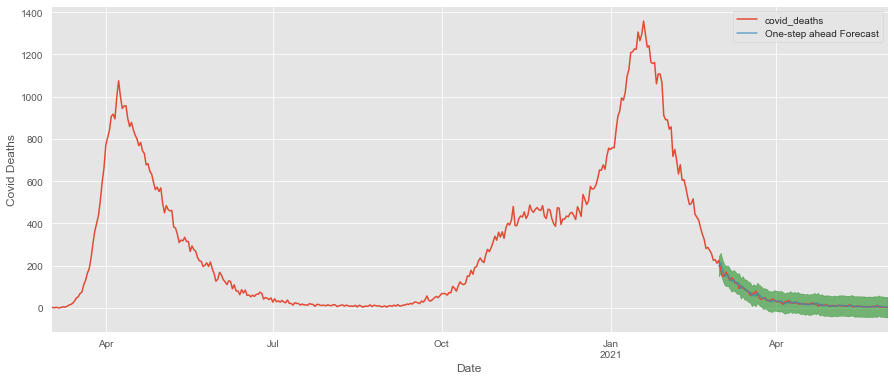

In [24]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Covid Deaths')
plt.legend()

plt.show()

In [25]:
# Get the real and predicted values
death_forecasted = pred.predicted_mean
death_truth = df['2021-03-01':]['covid_deaths']

# Compute the mean square error
mse = ((death_forecasted - death_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))

The Mean Squared Error is 79.8


In [26]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2021-03-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

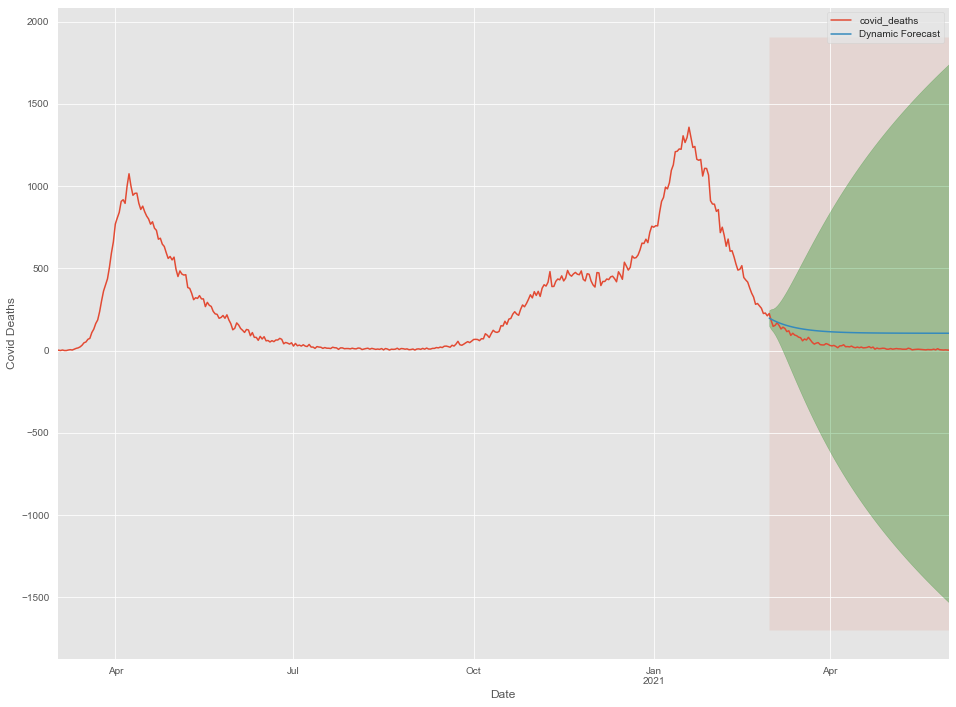

In [27]:
ax = series.plot(label='observed', figsize=(16, 12))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2021-03-01'), death_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Covid Deaths')

plt.legend()
plt.savefig('dynamicforecast.png', dpi=300)
plt.show()

In [28]:
# Extract the predicted and true values of our time series
death_forecasted = pred_dynamic.predicted_mean
death_truth = series['covid_deaths']

# Compute the mean square error
mse = ((death_forecasted - death_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6886.45


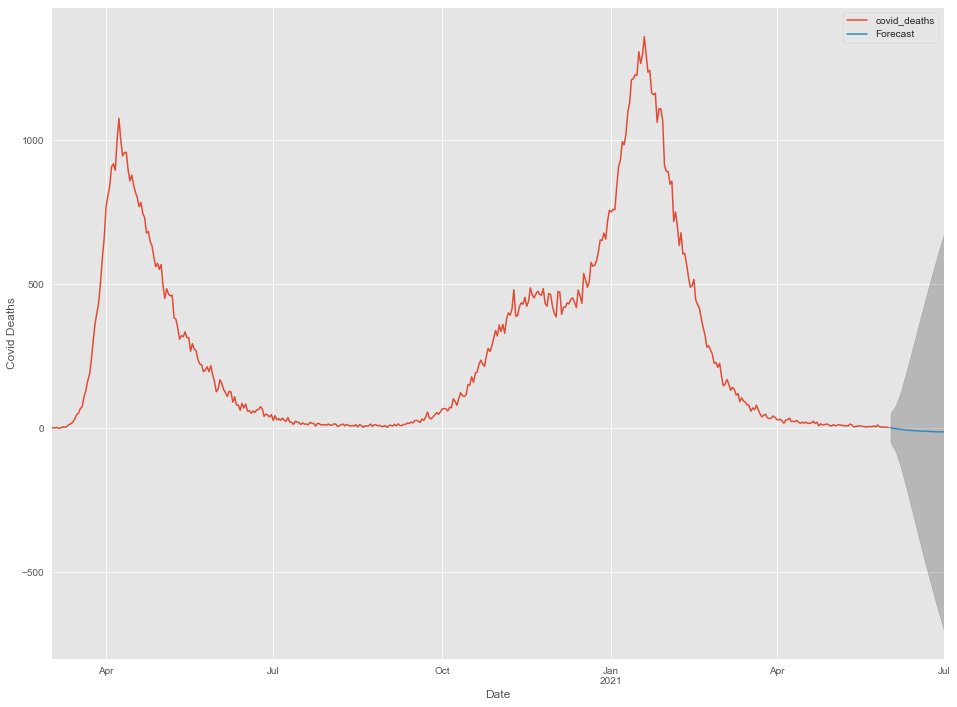

In [30]:
# Get forecast 7 steps ahead in future
prediction = output.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()


# Plot future predictions with confidence intervals
ax = series.plot(label='observed', figsize=(16, 12))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Covid Deaths')

plt.legend()
plt.savefig('forecast.png', dpi=300)
plt.show()

# Google Trends Data

In [31]:
#pip install pytrends

In [98]:
import pytrends
from pytrends.request import TrendReq
pytrend = TrendReq()

In [99]:
keywords=['Stress','Anxiety','Divorce','Suicide', 'Violence'] 
keywords_codes=[pytrend.suggestions(keyword=i)[0] for i in keywords] 
df_codes= pd.DataFrame(keywords_codes)
df_codes

,mid,title,type
0,/m/012lyw,Stress,Topic
1,/m/0k_9,Anxiety,Emotional disorder
2,/m/0b03h,Divorce,Topic
3,/m/06z5s,Suicide,Topic
4,/m/0chbx,Violence,Topic


In [100]:
exact_keywords=df_codes['mid'].to_list()
date_interval='2019-06-01 2021-04-01'
country=["GB"]                                  #Use this link for iso country code
category=0                                      # Use this link to select categories
search_type='' 

In [101]:
Individual_exact_keyword = list(zip(*[iter(exact_keywords)]*1))
Individual_exact_keyword = [list(x) for x in Individual_exact_keyword]
dicti = {}
i = 1
for Country in country:
    for keyword in Individual_exact_keyword:
        pytrend.build_payload(kw_list=keyword, 
                              timeframe = date_interval, 
                              geo = Country, 
                              cat=category,
                              gprop=search_type) 
        dicti[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(dicti, axis=1)
df_trends

1                 2                  3                  4  \
           /m/012lyw isPartial /m/0k_9 isPartial /m/0b03h isPartial /m/06z5s   
date                                                                           
2019-06-02        63     False      82     False       65     False       30   
2019-06-09        56     False      80     False       68     False       27   
2019-06-16        58     False      83     False       70     False       26   
2019-06-23        55     False      73     False       70     False       32   
2019-06-30        53     False      73     False       59     False       26   
...              ...       ...     ...       ...      ...       ...      ...   
2021-02-28        59     False      98     False       72     False       28   
2021-03-07        65     False      96     False       80     False       33   
2021-03-14        77     False      97     False       77     False       34   
2021-03-21        66     False     100     False       68     False       30   
2021-03-28        66     False      83     False       65     False       34   

                            5            
           isPartial /m/0chbx isPartial  
date                                     
2019-06-02     False       32     False  
2019-06-09     False       37     False  
2019-06-16     False       32     False  
2019-06-23     False       29     False  
2019-06-30     False       30     False  
...              ...      ...       ...  
2021-02-28     False       34     False  
2021-03-07     False       46     False  
2021-03-14     False       54     False  
2021-03-21     False       40     False  
2021-03-28     False       35     False  

[96 rows x 10 columns]

In [102]:
df_trends.columns = df_trends.columns.droplevel(0)                  #drop outside header
df_trends = df_trends.drop('isPartial', axis = 1)                   #drop "isPartial"
df_trends.reset_index(level=0,inplace=True)                         #reset_index
df_trends.columns=['date',
                   'Stress-UK',
                   'Anxiety-UK',
                   'Divorce-UK',
                   'Suicide-UK',
                   'Violence-UK']

In [103]:
df_trends.head()

,date,Stress-UK,Anxiety-UK,Divorce-UK,Suicide-UK,Violence-UK
0,2019-06-02,63,82,65,30,32
1,2019-06-09,56,80,68,27,37
2,2019-06-16,58,83,70,26,32
3,2019-06-23,55,73,70,32,29
4,2019-06-30,53,73,59,26,30


## Visualize google trends

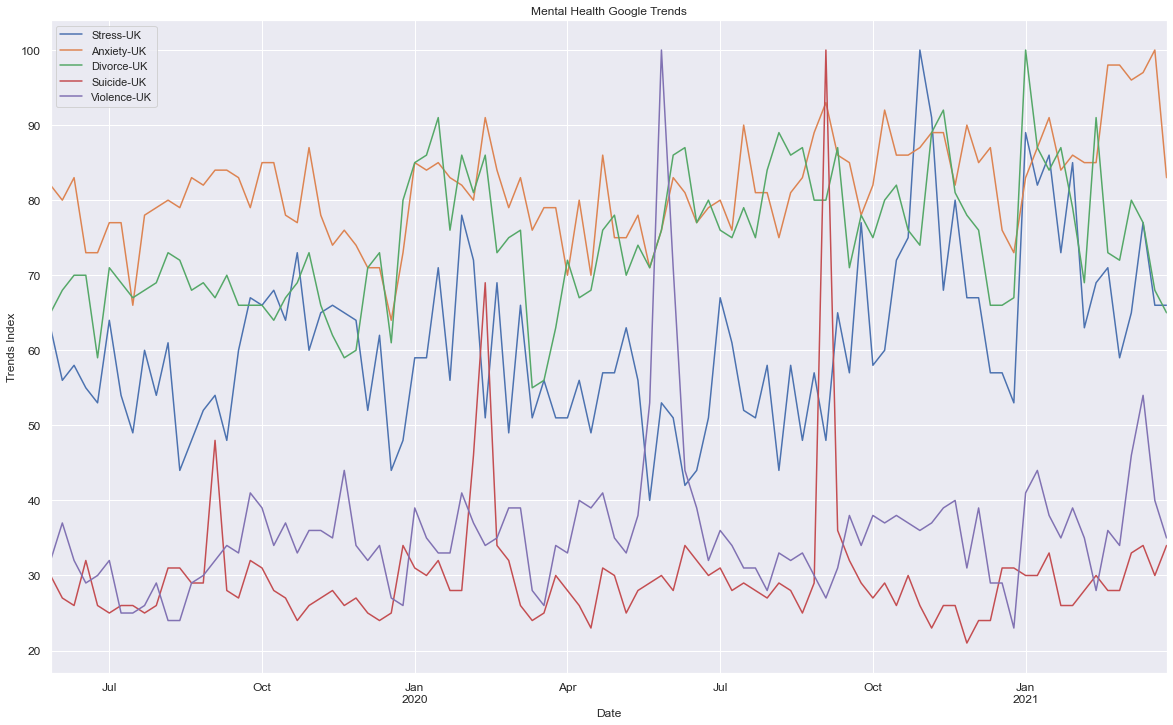

In [104]:
import seaborn as sns
sns.set(color_codes=True)

dx = df_trends.plot(figsize = (20,12),x="date", 
                    y=['Stress-UK','Anxiety-UK','Divorce-UK','Suicide-UK', 'Violence-UK'],
                    kind="line", title = "Mental Health Google Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=12)

It is unclear what is happening in this graph. To better understand if there is a trend here, let's plot the trend using rolling analysis of time series.

### Smoothing the data

In [105]:
df_ = df_trends[['date', 'Stress-UK','Anxiety-UK','Divorce-UK','Suicide-UK', 'Violence-UK']].set_index('date')
df_.head()

,Stress-UK,Anxiety-UK,Divorce-UK,Suicide-UK,Violence-UK
date,,,,,
2019-06-02,63,82,65,30,32
2019-06-09,56,80,68,27,37
2019-06-16,58,83,70,26,32
2019-06-23,55,73,70,32,29
2019-06-30,53,73,59,26,30


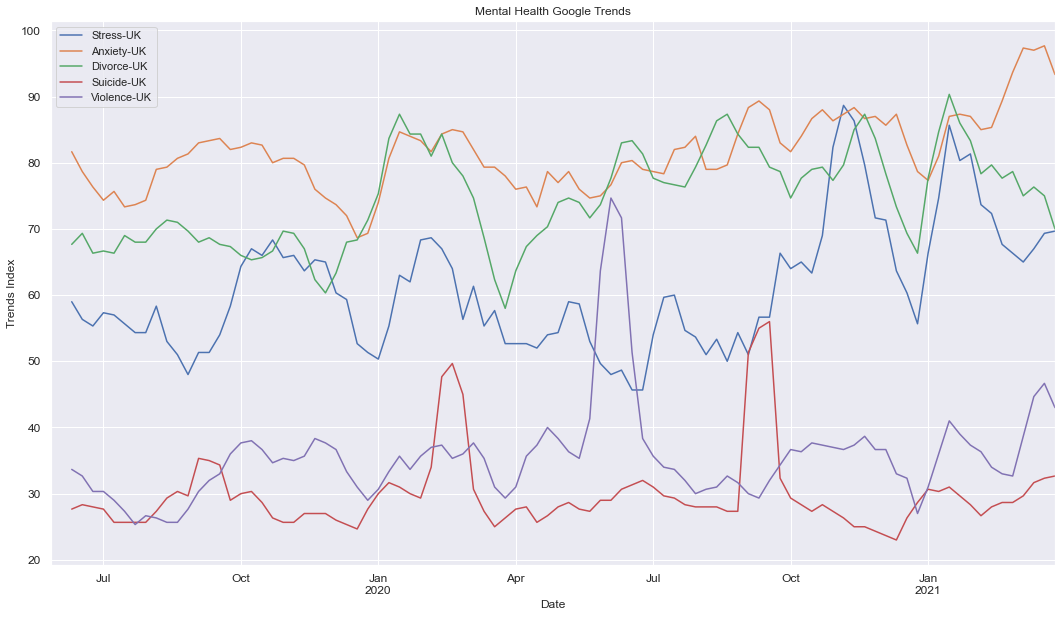

In [106]:
import seaborn as sns
sns.set(color_codes=True)

df_trends.set_index("date", drop=True, inplace=True)

ma = df_trends.rolling(window=3).mean()
dx = ma.plot(figsize = (18,10))

dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.set_title('Mental Health Google Trends')

dx.tick_params(axis='both', which='both', labelsize=12)

It seems like there's a positive correlation between these search terms and the covid crisis, but it's quite unclear. Instead, let's look at a graph that computes the average search interest of each term and compare that with covid's search interest.

To better visualize if the coronavirus had a direct impact on search queries, let's add some vertical lines to the graph, each of which will represent an important dates about Covid-19.

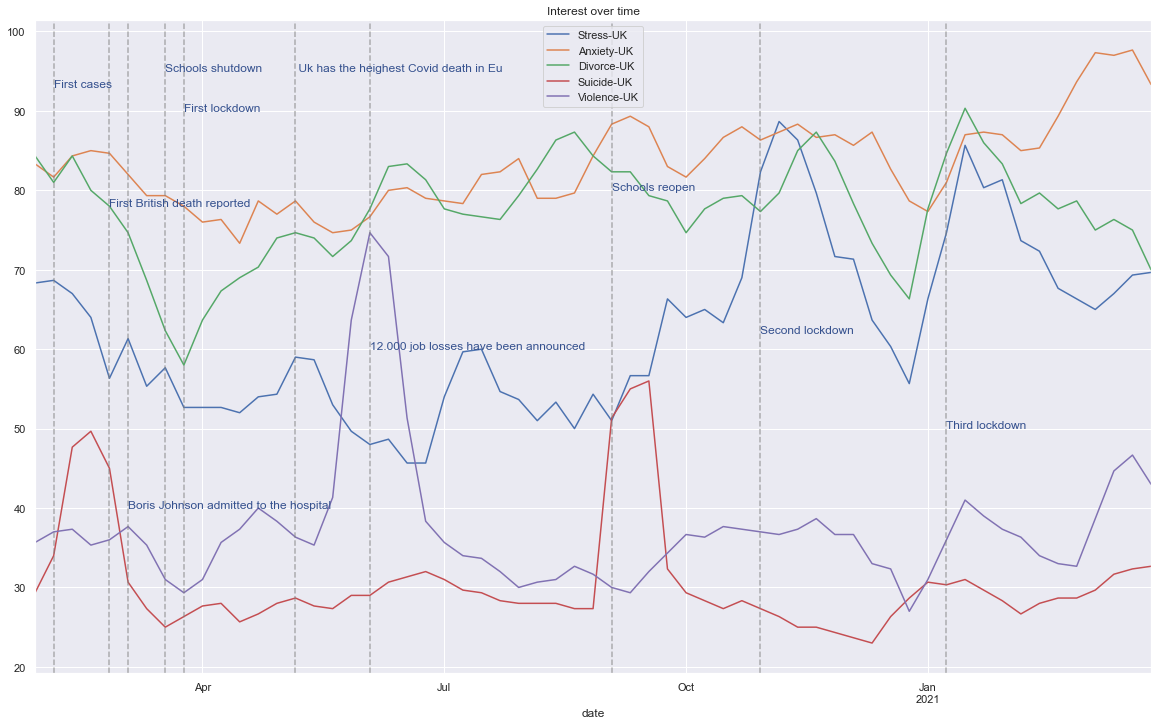

In [107]:
notable_dates = [
    ('2020-02-07', 93, "First cases"),
    ('2020-02-28', 78, "First British death reported"),
    ('2020-03-05', 40, "Boris Johnson admitted to the hospital"),
    ('2020-03-18', 95, "Schools shutdown"),
    ('2020-03-23', 90, "First lockdown"),
    ('2020-05-05', 95, " Uk has the heighest Covid death in Eu"),
    ('2020-06-01', 60, "12.000 job losses have been announced"),
    ('2020-09-01', 80, "Schools reopen"),
    ('2020-10-31', 62, "Second lockdown"),
    ('2021-01-06', 50, "Third lockdown"),
]

# plot the data subsetting from February 2020 to the end of the dataset
ma.loc['2020-02-01':].plot(figsize=(20,12))

# for each date in notable_dates, plot a vertical line

for x in notable_dates:
    plt.axvline(x[0], color='grey', alpha=0.6, ls= '--')
    plt.text(x=x[0], y=x[1], s=x[2], alpha=0.99, color='#334f8d')


plt.title('Interest over time');

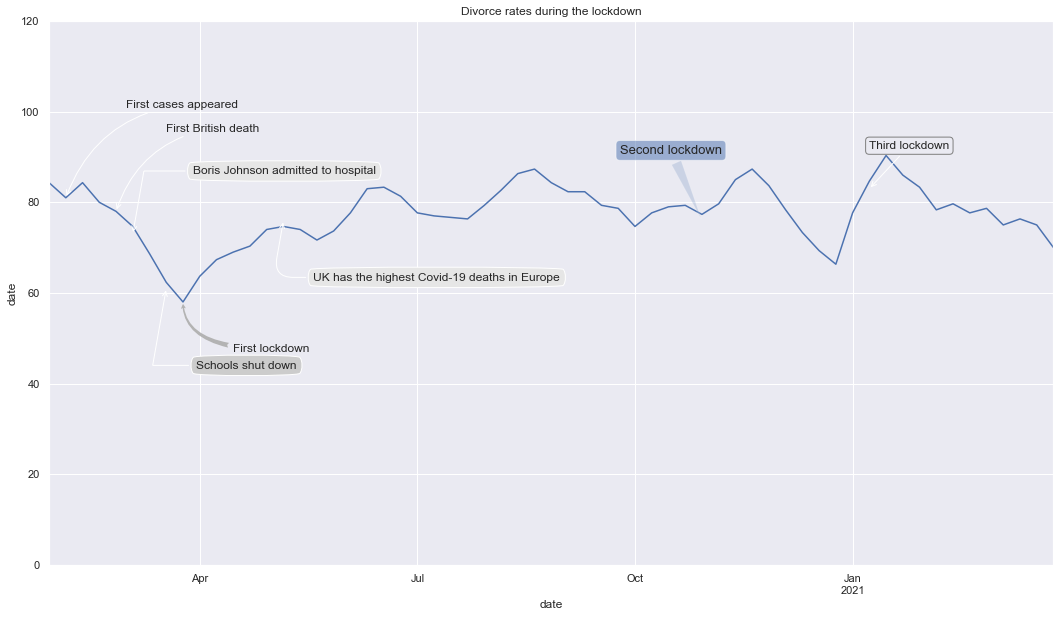

In [57]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(18, 10))
ma['Divorce-UK'].loc['2020-02-01':].plot(ax=ax)

# Add labels to the plot
ax.annotate("First cases appeared", xy=('2020-02-07', 81),  xycoords='data', xytext=(60, 90), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate("First British death", xy=('2020-02-28', 78),  xycoords='data', xytext=(50, 80), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate('Boris Johnson admitted to hospital', xy=('2020-03-05', 73), xycoords='data', xytext=(60, 60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=0.8"))

ax.annotate('Schools shut down', xy=('2020-03-18', 61), xycoords='data', xytext=(30, -80), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=0.3"))

ax.annotate('First lockdown', xy=('2020-03-23', 58),  xycoords='data', xytext=(50, -50), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.7", ec="none", connectionstyle="angle3,angleA=0,angleB=90"))

ax.annotate('UK has the highest Covid-19 deaths in Europe', xy=('2020-05-05',76),  xycoords='data', xytext=(30, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Second lockdown', xy=('2020-10-31', 76),  xycoords='data', xytext=(20, 70), textcoords='offset points',
            size=13, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.5), arrowprops=dict(arrowstyle="wedge,tail_width=0.8", alpha=0.2,));

ax.annotate("Third lockdown", xy=('2021-01-06', 83),  xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(40, 40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))



# Label the axes
ax.set(title='Divorce rates during the lockdown',
       ylabel='date')
    
    
ax.set_ylim(0, 120);

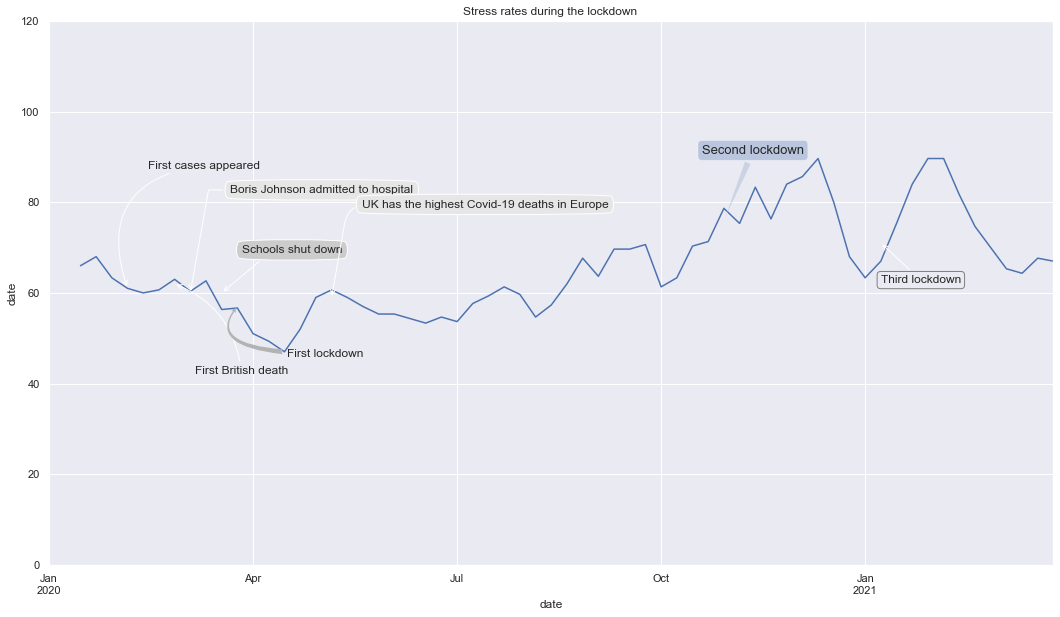

In [41]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(18, 10))
ma['Stress-UK'].plot(ax=ax)

# Add labels to the plot
ax.annotate("First cases appeared", xy=('2020-02-07', 61),  xycoords='data', xytext=(20, 120),
            textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.6"))

ax.annotate("First British death", xy=('2020-02-28', 62),  xycoords='data', xytext=(20, -90),
            textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate('Boris Johnson admitted to hospital', xy=('2020-03-05', 60), xycoords='data', xytext=(40, 100),
            textcoords='offset points', bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), 
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=0.8"))

ax.annotate('Schools shut down', xy=('2020-03-18', 60), xycoords='data', xytext=(20, 40), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"), 
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=40,rad=0.3"))

ax.annotate('First lockdown', xy=('2020-03-23', 57),  xycoords='data', xytext=(50, -50), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.7", ec="none", connectionstyle="angle3,angleA=0,angleB=50"))

ax.annotate('UK has the highest Covid-19 deaths in Europe', xy=('2020-05-05',59),  xycoords='data', xytext=(30, 90),
            textcoords='offset points', bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Second lockdown', xy=('2020-10-31', 76),  xycoords='data', xytext=(80, 70), textcoords='offset points',
            size=13, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.3),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.2,));

ax.annotate("Third lockdown", xy=('2021-01-06', 71),  xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(40, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))



# Label the axes
ax.set(title='Stress rates during the lockdown ',
       ylabel='date')


ax.set_ylim(0, 120);

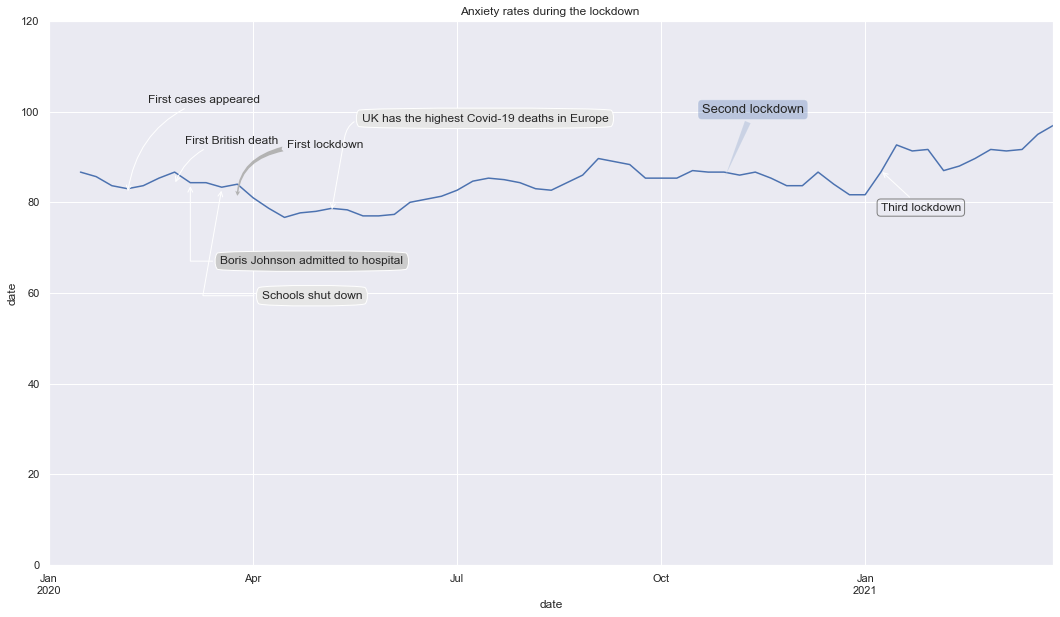

In [30]:
fig, ax = plt.subplots(figsize=(18, 10))
ma['Anxiety-UK'].plot(ax=ax)

# Add labels to the plot
ax.annotate("First cases appeared", xy=('2020-02-07', 82),  xycoords='data', xytext=(20, 90), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate("First British death", xy=('2020-02-28', 84),  xycoords='data', xytext=(10, 40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate('Boris Johnson admitted to hospital', xy=('2020-03-05', 84), xycoords='data', xytext=(30, -80), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=0.1"))

ax.annotate('Schools shut down', xy=('2020-03-18', 83), xycoords='data', xytext=(40, -110), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=0.3"))

ax.annotate('First lockdown', xy=('2020-03-23', 81),  xycoords='data', xytext=(50, 50), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.7", ec="none", connectionstyle="angle3,angleA=0,angleB=90"))

ax.annotate('UK has the highest Covid-19 deaths in Europe', xy=('2020-05-05',78),  xycoords='data', xytext=(30, 90), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Second lockdown', xy=('2020-10-31', 85),  xycoords='data', xytext=(80, 70), textcoords='offset points',
            size=13, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.3), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.2,));

ax.annotate("Third lockdown", xy=('2021-01-06', 87),  xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(40, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))



# Label the axes
ax.set(title='Anxiety rates during the lockdown ',
       ylabel='date')


ax.set_ylim(0, 120);

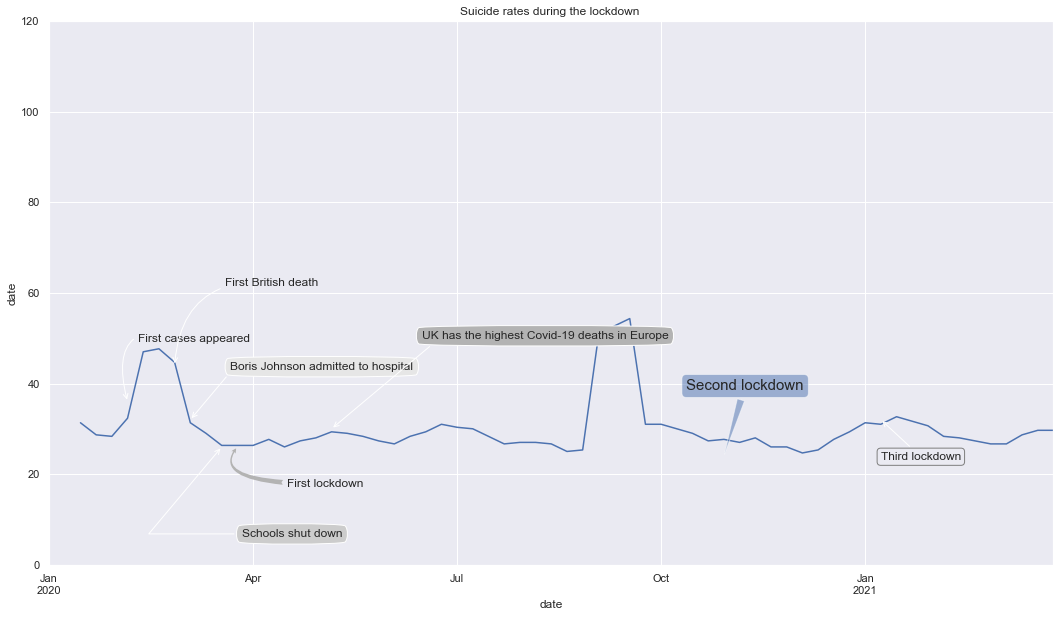

In [27]:
fig, ax = plt.subplots(figsize=(18, 10))
ma['Suicide-UK'].plot(ax=ax)

# Add labels to the plot
ax.annotate("First cases appeared", xy=('2020-02-07', 36),  xycoords='data', xytext=(10, 60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.9"))

ax.annotate("First British death", xy=('2020-02-28', 44),  xycoords='data', xytext=(50, 80), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.5"))

ax.annotate('Boris Johnson admitted to hospital', xy=('2020-03-05', 32), xycoords='data', xytext=(40, 50), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=50,rad=0.8"))

ax.annotate('Schools shut down', xy=('2020-03-18', 26), xycoords='data', xytext=(20, -90), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=50,rad=0.3"))

ax.annotate('First lockdown', xy=('2020-03-23', 26),  xycoords='data', xytext=(50, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.7", ec="none", connectionstyle="angle3,angleA=0,angleB=50"))

ax.annotate('UK has the highest Covid-19 deaths in Europe', xy=('2020-05-05',30),  xycoords='data', xytext=(90, 90), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.7"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=40,rad=10"))


ax.annotate('Second lockdown', xy=('2020-10-31', 24),  xycoords='data', xytext=(80, 70), textcoords='offset points',
            size=15, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.5), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.5,));

ax.annotate("Third lockdown", xy=('2021-01-06', 32),  xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(40, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))



# Label the axes
ax.set(title='Suicide rates during the lockdown ',
       ylabel='date')


ax.set_ylim(0, 120);

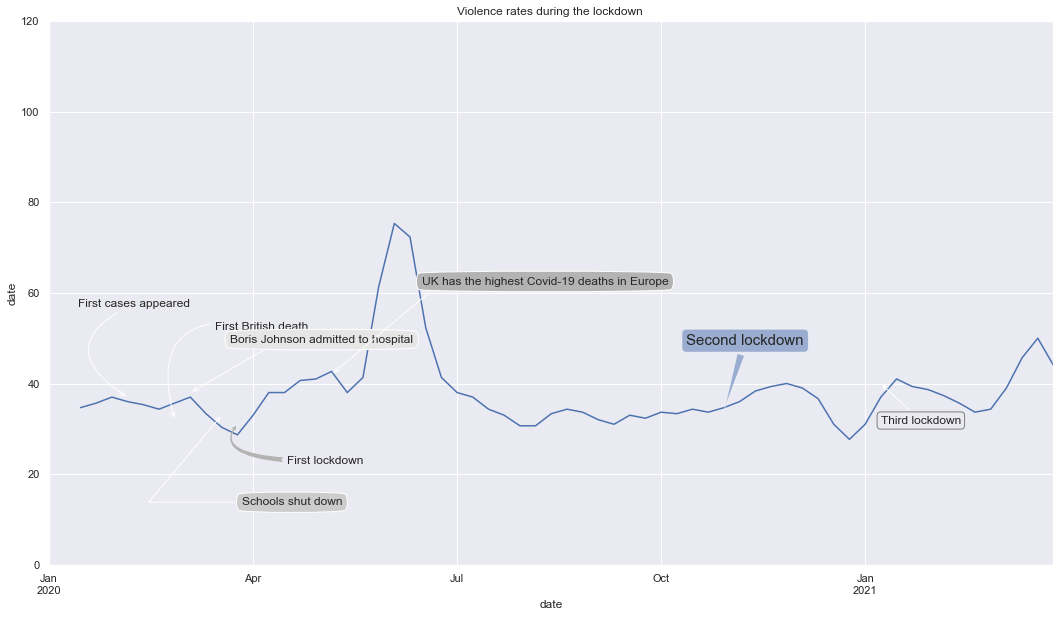

In [36]:
fig, ax = plt.subplots(figsize=(18, 10))
ma['Violence-UK'].plot(ax=ax)

# Add labels to the plot
ax.annotate("First cases appeared", xy=('2020-02-07', 37),  xycoords='data', xytext=(-50, 90),
            textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.9"))

ax.annotate("First British death", xy=('2020-02-28', 32),  xycoords='data', xytext=(40, 90),
            textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.8"))

ax.annotate('Boris Johnson admitted to hospital', xy=('2020-03-05', 38), xycoords='data', xytext=(40, 50),
            textcoords='offset points', bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=30,rad=0.8"))

ax.annotate('Schools shut down', xy=('2020-03-18', 33), xycoords='data', xytext=(20, -90), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=50,rad=0.3"))

ax.annotate('First lockdown', xy=('2020-03-23', 31),  xycoords='data', xytext=(50, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.7", ec="none", connectionstyle="angle3,angleA=0,angleB=50"))

ax.annotate('UK has the highest Covid-19 deaths in Europe', xy=('2020-05-05',42),  xycoords='data', xytext=(90, 90),
            textcoords='offset points', bbox=dict(boxstyle="round4,pad=.5", fc="0.7"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=40,rad=10"))


ax.annotate('Second lockdown', xy=('2020-10-31', 34),  xycoords='data', xytext=(80, 70), textcoords='offset points',
            size=15, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.5), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.5,));

ax.annotate("Third lockdown", xy=('2021-01-06', 40),  xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(40, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))



# Label the axes
ax.set(title='Violence rates during the lockdown ',
       ylabel='date')


ax.set_ylim(0, 120);

## Twitter Sentiment Analysis

In [58]:
import pandas as pd 
import numpy as np 
import gzip
import shutil
import os
import csv
import linecache
from shutil import copyfile
import ipywidgets as widgets
import glob
import os, glob
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

# for visualisation;
from matplotlib import ticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from plotly.graph_objs import *

sns.set(style="darkgrid")


# for machine learning;
from sklearn import svm
from sklearn import datasets, metrics, model_selection, svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, recall_score

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Run this lines to flush py files cache
%reload_ext autoreload
%autoreload 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm_notebook as tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sifatok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sifatok/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Obtaining Twitter Data

In [7]:
df = pd.read_csv('full_dataset_clean.tsv.gz', compression='gzip', 
                                 header=0, quotechar='"',sep="\t")

lang_list = df.lang.unique()
lang_list= sorted(np.append(lang_list,'en'))
lang_picker = widgets.Dropdown(options=lang_list, value="en")
lang_picker

Dropdown(index=13, options=('am', 'ar', 'bg', 'bn', 'bo', 'ca', 'ckb', 'cs', 'cy', 'da', 'de', 'dv', 'el', 'en…

In [8]:
df.shape

(283307680, 5)

In [9]:
df.head()

,tweet_id,date,time,lang,country_place
0,1212470713338286081,2020-01-01,20:28:39,ru,NaN
1,1212537749485449216,2020-01-02,00:55:01,ru,NaN
2,1212640596508237824,2020-01-02,07:43:42,ru,DE
3,1212707879872016384,2020-01-02,12:11:04,ru,NaN
4,1213076662818091008,2020-01-03,12:36:28,ru,RU


In [27]:
df.tail()

,tweet_id,date,time,lang,country_place
283281443,1406399199797723137,2021-06-19,23:51:13,und,GB
283281969,1406400540905463810,2021-06-19,23:56:33,en,GB
283289236,1406417261817208832,2021-06-20,01:02:59,en,GB
283301333,1406446938145370112,2021-06-20,03:00:55,en,GB
283306895,1406461053878349827,2021-06-20,03:57:00,en,GB


In [10]:
df.columns

Index(['tweet_id', 'date', 'time', 'lang', 'country_place'], dtype='object')

### Filtering data  

In [20]:
places_list = ['GB']
dfx = df.loc[df['country_place'].str.contains('|'.join(places_list), case=False, na=False)]
dfx[['country_place']].head()

,country_place
1205,GB
4207,GB
5195,GB
5410,GB
5768,GB


In [22]:
dfx.to_csv( "labeled_data.csv", index=False, encoding='utf-8-sig')

In [25]:
labeled_data = pd.read_csv('labeled_data.csv')
labeled_data.shape

(633248, 5)

In [32]:
import time

ts = str(time.time())
start_from = 600001
number_of_tweets = 33500
t_list = labeled_data["tweet_id"].tolist()[start_from:start_from+number_of_tweets]

with open(f'tweets_file_{ts}.txt', 'w') as f:
    for item in t_list:
        f.write("%s\n" % item)

### Combining Tweets

In [34]:
extension = 'csv'
all_filenames = [i for i in glob.glob('tweets_file/*.{}'.format(extension))]


#combine all files in the list
raw_data = pd.concat([pd.read_csv(f) for f in all_filenames ])


#export to csv
raw_data.to_csv( "raw_data.csv", index=False, encoding='utf-8-sig')


In [35]:
raw_data.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Fri Mar 26 18:51:18 +0000 2021,DateOfAlQadrNightRamadan1442,NaN,http://noon-group.org/forum/showthread.php?p=3...,1,1375520756340244485,NaN,NaN,NaN,...,331,334,0,NaN,ربيد صيفان,robeed43__9,1520,NaN,NaN,False
1,NaN,Fri Mar 26 18:46:16 +0000 2021,DateOfAlQadrNightRamadan1442,NaN,https://nasser-yamani.com/forum/showthread.php...,0,1375519486745448458,NaN,NaN,NaN,...,775,769,0,NaN,🌸نسرين🌸,nisreenmura,1054,NaN,NaN,False
2,NaN,Fri Mar 26 18:47:00 +0000 2021,DateOfAlQadrNightRamadan1442,NaN,http://mahdialumma.online/showthread.php?p=344480,0,1375519672888664064,NaN,NaN,NaN,...,198,197,0,NaN,A_ alathwari,AlathwaryAhmad,3182,NaN,NaN,False
3,NaN,Fri Mar 26 18:47:01 +0000 2021,DateOfAlQadrNightRamadan1442,NaN,http://mahdialumma.online/showthread.php?p=344480,1,1375519675333902337,NaN,NaN,NaN,...,488,1041,0,Yemen,محمد القرماني 2,sls200730,9221,NaN,https://www.nasser-yamani.com,False
4,NaN,Fri Mar 26 18:50:32 +0000 2021,DateOfAlQadrNightRamadan1442,NaN,http://bushra-islamia.com/forum/forum/showthre...,2,1375520563616231425,NaN,NaN,NaN,...,138,238,0,المملكة العربية السعودية,لماذا خلقت؟,sls200780,2545,NaN,NaN,False


In [36]:
raw_data.shape

(510298, 34)

In [68]:
list(raw_data.columns)

['coordinates',
 'created_at',
 'hashtags',
 'media',
 'urls',
 'favorite_count',
 'id',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'lang',
 'place',
 'possibly_sensitive',
 'retweet_count',
 'retweet_id',
 'retweet_screen_name',
 'source',
 'text',
 'tweet_url',
 'user_created_at',
 'user_screen_name',
 'user_default_profile_image',
 'user_description',
 'user_favourites_count',
 'user_followers_count',
 'user_friends_count',
 'user_listed_count',
 'user_location',
 'user_name',
 'user_screen_name.1',
 'user_statuses_count',
 'user_time_zone',
 'user_urls',
 'user_verified']

In [46]:
joined_df = pd.merge(raw_data, labeled_data,  how='left', left_on='id', right_on = 'tweet_id')

In [47]:
joined_df.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,tweet_id,date,time,lang_y,country_place
0,NaN,Fri Mar 26 18:51:18 +0000 2021,DateOfAlQadrNightRamadan1442,NaN,http://noon-group.org/forum/showthread.php?p=3...,1,1375520756340244485,NaN,NaN,NaN,...,robeed43__9,1520,NaN,NaN,False,1375520756340244485,2021-03-26,18:51:18,en,GB
1,NaN,Fri Mar 26 18:46:16 +0000 2021,DateOfAlQadrNightRamadan1442,NaN,https://nasser-yamani.com/forum/showthread.php...,0,1375519486745448458,NaN,NaN,NaN,...,nisreenmura,1054,NaN,NaN,False,1375519486745448458,2021-03-26,18:46:16,en,GB
2,NaN,Fri Mar 26 18:47:00 +0000 2021,DateOfAlQadrNightRamadan1442,NaN,http://mahdialumma.online/showthread.php?p=344480,0,1375519672888664064,NaN,NaN,NaN,...,AlathwaryAhmad,3182,NaN,NaN,False,1375519672888664064,2021-03-26,18:47:00,en,GB
3,NaN,Fri Mar 26 18:47:01 +0000 2021,DateOfAlQadrNightRamadan1442,NaN,http://mahdialumma.online/showthread.php?p=344480,1,1375519675333902337,NaN,NaN,NaN,...,sls200730,9221,NaN,https://www.nasser-yamani.com,False,1375519675333902337,2021-03-26,18:47:01,en,GB
4,NaN,Fri Mar 26 18:50:32 +0000 2021,DateOfAlQadrNightRamadan1442,NaN,http://bushra-islamia.com/forum/forum/showthre...,2,1375520563616231425,NaN,NaN,NaN,...,sls200780,2545,NaN,NaN,False,1375520563616231425,2021-03-26,18:50:32,en,GB


In [52]:
joined_df.text

0         #DateOfAlQadrNightRamadan1442\n"Confirming wit...
1         #DateOfAlQadrNightRamadan1442\nNon will witnes...
2         #DateOfAlQadrNightRamadan1442\n"Perhaps the en...
3         #DateOfAlQadrNightRamadan1442\n"as a mirage in...
4         #DateOfAlQadrNightRamadan1442\n"I am the Imam ...
                                ...                        
510297                              https://t.co/uK2Jt4CBKA
510298    Berlin puts an end to protests against coronav...
510299    The folly of delaying until we have perfect da...
510300    Great to be on @CNBC this morning talking abou...
510301    Drug makers rebut Trump tweet that FDA ‘deep s...
Name: text, Length: 510302, dtype: object

In [110]:
#list(joined_df.user_location)

In [111]:
places_list = ['GB', 'uk', 'london', 'wales', 'scotland', 'ireland', 'england', 'united_kingdom','edinburgh',
               'devon', 'leeds', 'southampton', 'cambridge', 'oxford']
df = joined_df.loc[joined_df['user_location'].str.contains('|'.join(places_list), case=False, na=False)]
df[['user_location']].head()

,user_location
9,"Wiltshire, England"
13,"Salisbury, England"
29,"Ingleby Barwick, England"
34,"Lincoln, England"
40,England


In [112]:
df.shape

(288812, 39)

In [113]:
df.to_csv( "data.csv", index=False, encoding='utf-8-sig')


## Working with actual data

In [59]:
data = pd.read_csv('data.csv')
data.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,tweet_id,date,time,lang_y,country_place
0,NaN,Fri Mar 26 18:45:39 +0000 2021,Covid19,NaN,NaN,0,1375519332537671681,BBCBreakfast,1.375518e+18,143415291.0,...,John_R_Cochrane,10103.0,NaN,http://www.JohnCochrane.online,False,1.375519e+18,2021-03-26,18:45:39,en,GB
1,NaN,Fri Mar 26 18:47:04 +0000 2021,NaN,NaN,https://twitter.com/abcdtweets/status/13755162...,7,1375519689678413824,NaN,NaN,NaN,...,rickettspiano,4826.0,NaN,NaN,False,1.375520e+18,2021-03-26,18:47:04,en,GB
2,NaN,Fri Mar 26 18:45:21 +0000 2021,NaN,NaN,https://twitter.com/PoliticsForAlI/status/1375...,0,1375519257753055234,NaN,NaN,NaN,...,WJB2201,4604.0,NaN,NaN,False,1.375519e+18,2021-03-26,18:45:21,en,GB
3,NaN,Fri Mar 26 18:47:17 +0000 2021,NaN,NaN,https://twitter.com/PoliticsForAlI/status/1375...,0,1375519743218749440,NaN,NaN,NaN,...,robpatterson24,17670.0,NaN,NaN,False,1.375520e+18,2021-03-26,18:47:17,en,GB
4,NaN,Fri Mar 26 18:52:09 +0000 2021,beingunited NHSCOVIDVaccine COVID19,https://twitter.com/CadellRowe/status/13755209...,NaN,14,1375520969914208264,NaN,NaN,NaN,...,CadellRowe,11215.0,NaN,http://united.com,False,1.375521e+18,2021-03-26,18:52:09,en,GB


In [60]:
# Selecting the needed columns;

needed_columns = ['user_name', 'created_at', 'text']
data = data[needed_columns]
data.head()

,user_name,created_at,text
0,John Cochrane,Fri Mar 26 18:45:39 +0000 2021,"@BBCBreakfast A year ago, why did Chris Smith ..."
1,Hazel Ricketts,Fri Mar 26 18:47:04 +0000 2021,"""In time for Holy Week... hurrah! Oh. Wait... ..."
2,will,Fri Mar 26 18:45:21 +0000 2021,🤣🤣🤣🤣🤣 where do they make this shite up from ht...
3,Rob Patterson,Fri Mar 26 18:47:17 +0000 2021,They’re just throwing darts at maps now 😴 http...
4,CadellRowe,Fri Mar 26 18:52:09 +0000 2021,So Grateful to receive my 1st vaccinated! @we...


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415736 entries, 0 to 415735
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_name   288808 non-null  object
 1   created_at  317432 non-null  object
 2   text        317429 non-null  object
dtypes: object(3)
memory usage: 9.5+ MB


In [62]:
# Changing the type of some columns;

data.user_name = data.user_name.astype('category')
data.user_name = data.user_name.cat.codes
data.head()

,user_name,created_at,text
0,25446,Fri Mar 26 18:45:39 +0000 2021,"@BBCBreakfast A year ago, why did Chris Smith ..."
1,20682,Fri Mar 26 18:47:04 +0000 2021,"""In time for Holy Week... hurrah! Oh. Wait... ..."
2,59117,Fri Mar 26 18:45:21 +0000 2021,🤣🤣🤣🤣🤣 where do they make this shite up from ht...
3,43225,Fri Mar 26 18:47:17 +0000 2021,They’re just throwing darts at maps now 😴 http...
4,7575,Fri Mar 26 18:52:09 +0000 2021,So Grateful to receive my 1st vaccinated! @we...


In [63]:
# Picking out the tweet text;

texts = data['text']
texts

0         @BBCBreakfast A year ago, why did Chris Smith ...
1         "In time for Holy Week... hurrah! Oh. Wait... ...
2         🤣🤣🤣🤣🤣 where do they make this shite up from ht...
3         They’re just throwing darts at maps now 😴 http...
4         So Grateful to receive my 1st vaccinated!  @we...
                                ...                        
415731                  Excellent 👍 https://t.co/iWNsGruulm
415732    This must be the first year for ages a new cat...
415733                              https://t.co/uK2Jt4CBKA
415734    Berlin puts an end to protests against coronav...
415735    Great to be on @CNBC this morning talking abou...
Name: text, Length: 415736, dtype: object

In [64]:
# Removing emojis and URLs;

def remove_emojis(text):
    import re
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

In [65]:
# Define text processing function

def preprocess(text):
    import re, string
    
    text = text.replace('(<br/>)', ' ')
    text = text.replace('(&amp)', ' ')
    text = text.replace('(&gt)', ' ')
    text = text.replace('(&lt)', ' ')
    text = text.replace('(\xa0)', ' ')
    text = text.replace(r'\n',' ',)
    text = text.replace(r'#',' ',)
    text = text.replace('"',' ',)
    text = text.replace("'",' ',)
    
    # Remove URL
    text = re.sub(r"(?:\@|http?\://|https?\://|www.)\S+", "", text)
    
    # Remove emoji
    text = remove_emojis(text)
    
    # Remove punctuation
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    
    # Remove white space
    text = " ".join(text.split())
    
    return text

In [66]:
data['cleaned_text'] = data['text'].astype(str).apply(preprocess)


In [67]:
# Saving tweet data as csv
data.to_csv('cleaned_tweets.csv', encoding='utf-8', index=False)


#reading cleaned tweet dataset
df = pd.read_csv("cleaned_tweets.csv")
df.head()

,user_name,created_at,text,cleaned_text
0,25446,Fri Mar 26 18:45:39 +0000 2021,"@BBCBreakfast A year ago, why did Chris Smith ...",A year ago why did Chris Smith describe Covid1...
1,20682,Fri Mar 26 18:47:04 +0000 2021,"""In time for Holy Week... hurrah! Oh. Wait... ...",In time for Holy Week hurrah Oh Wait but we pl...
2,59117,Fri Mar 26 18:45:21 +0000 2021,🤣🤣🤣🤣🤣 where do they make this shite up from ht...,where do they make this shite up from
3,43225,Fri Mar 26 18:47:17 +0000 2021,They’re just throwing darts at maps now 😴 http...,They’re just throwing darts at maps now
4,7575,Fri Mar 26 18:52:09 +0000 2021,So Grateful to receive my 1st vaccinated! @we...,So Grateful to receive my 1st vaccinated being...


# Sentiment Analysis

### VADER Sentiment Analysis and Feature Engineering

In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Creating columns for each polarity score
df['negative'] = df['cleaned_text'].astype(str).apply(lambda cleaned_text: analyzer.polarity_scores(cleaned_text)['neg'])
df['neutral'] = df['cleaned_text'].astype(str).apply(lambda cleaned_text: analyzer.polarity_scores(cleaned_text)['neu'])
df['positive'] = df['cleaned_text'].astype(str).apply(lambda cleaned_text: analyzer.polarity_scores(cleaned_text)['pos'])
df['compound'] = df['cleaned_text'].astype(str).apply(lambda cleaned_text: analyzer.polarity_scores(cleaned_text)['compound'])

In [69]:
df['vader_score'] = df['compound'].apply(lambda x: -1 if x<= -0.05 else(1 if x>= 0.05 else 0))


In [70]:
df['text_len'] = df['cleaned_text'].astype(str).apply(len)
df['text_word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))

In [71]:
df.head()

,user_name,created_at,text,cleaned_text,negative,neutral,positive,compound,vader_score,text_len,text_word_count
0,25446,Fri Mar 26 18:45:39 +0000 2021,"@BBCBreakfast A year ago, why did Chris Smith ...",A year ago why did Chris Smith describe Covid1...,0.052,0.880,0.068,0.1648,1,189,39
1,20682,Fri Mar 26 18:47:04 +0000 2021,"""In time for Holy Week... hurrah! Oh. Wait... ...",In time for Holy Week hurrah Oh Wait but we pl...,0.000,0.946,0.054,0.3182,1,210,41
2,59117,Fri Mar 26 18:45:21 +0000 2021,🤣🤣🤣🤣🤣 where do they make this shite up from ht...,where do they make this shite up from,0.000,1.000,0.000,0.0000,0,37,8
3,43225,Fri Mar 26 18:47:17 +0000 2021,They’re just throwing darts at maps now 😴 http...,They’re just throwing darts at maps now,0.000,1.000,0.000,0.0000,0,39,7
4,7575,Fri Mar 26 18:52:09 +0000 2021,So Grateful to receive my 1st vaccinated! @we...,So Grateful to receive my 1st vaccinated being...,0.000,0.732,0.268,0.5095,1,76,10


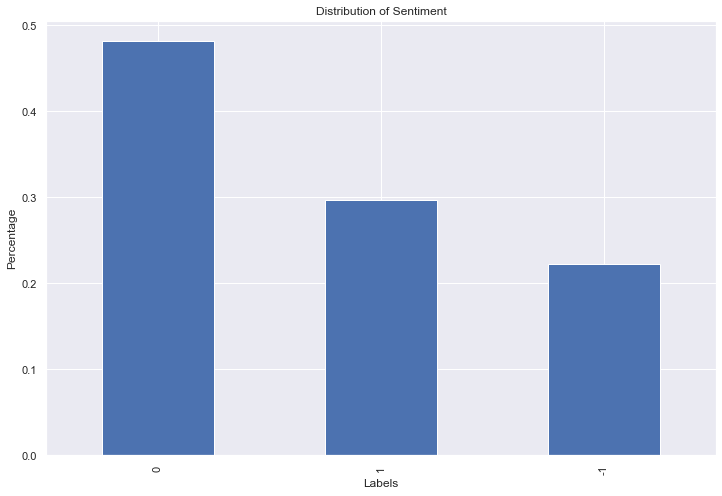

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,8))
df['vader_score'].value_counts(normalize=True).plot.bar()
ax.set_ylabel('Percentage')
ax.set_xlabel('Labels')
ax.set_title('Distribution of Sentiment')
plt.show()

In [73]:
# Converting the columns type to datetime
df['date'] = pd.to_datetime(df['created_at'], errors='coerce')
df.head()

,user_name,created_at,text,cleaned_text,negative,neutral,positive,compound,vader_score,text_len,text_word_count,date
0,25446,Fri Mar 26 18:45:39 +0000 2021,"@BBCBreakfast A year ago, why did Chris Smith ...",A year ago why did Chris Smith describe Covid1...,0.052,0.880,0.068,0.1648,1,189,39,2021-03-26 18:45:39+00:00
1,20682,Fri Mar 26 18:47:04 +0000 2021,"""In time for Holy Week... hurrah! Oh. Wait... ...",In time for Holy Week hurrah Oh Wait but we pl...,0.000,0.946,0.054,0.3182,1,210,41,2021-03-26 18:47:04+00:00
2,59117,Fri Mar 26 18:45:21 +0000 2021,🤣🤣🤣🤣🤣 where do they make this shite up from ht...,where do they make this shite up from,0.000,1.000,0.000,0.0000,0,37,8,2021-03-26 18:45:21+00:00
3,43225,Fri Mar 26 18:47:17 +0000 2021,They’re just throwing darts at maps now 😴 http...,They’re just throwing darts at maps now,0.000,1.000,0.000,0.0000,0,39,7,2021-03-26 18:47:17+00:00
4,7575,Fri Mar 26 18:52:09 +0000 2021,So Grateful to receive my 1st vaccinated! @we...,So Grateful to receive my 1st vaccinated being...,0.000,0.732,0.268,0.5095,1,76,10,2021-03-26 18:52:09+00:00


In [74]:
# Defining a new dataframe and setting date as index
df_a = df[['date', 'negative', 'neutral', 'positive', 'compound']].set_index('date')
df_a.head()

,negative,neutral,positive,compound
date,,,,
2021-03-26 18:45:39+00:00,0.052,0.880,0.068,0.1648
2021-03-26 18:47:04+00:00,0.000,0.946,0.054,0.3182
2021-03-26 18:45:21+00:00,0.000,1.000,0.000,0.0000
2021-03-26 18:47:17+00:00,0.000,1.000,0.000,0.0000
2021-03-26 18:52:09+00:00,0.000,0.732,0.268,0.5095


In [75]:
temp = df.groupby('vader_score').count()['cleaned_text'].reset_index().sort_values(by='cleaned_text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,vader_score,cleaned_text
2,1,123310
0,-1,92473
1,0,85851


In [76]:
df_a.index = pd.to_datetime(df_a.index)

# Visualizing Tweet Data

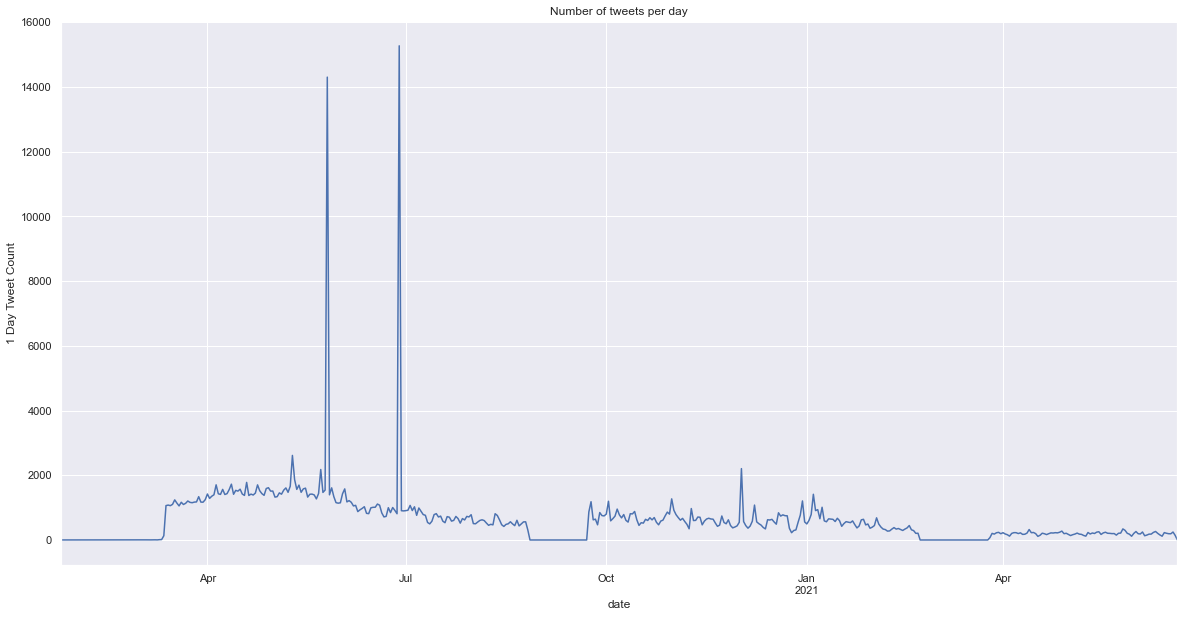

In [77]:
tweet_df_1day = df.groupby(pd.Grouper(key='date', freq='1D', convention='start')).size()
tweet_df_1day.plot(figsize=(20,10))
plt.ylabel('1 Day Tweet Count')
plt.title('Number of tweets per day')
plt.grid(True)

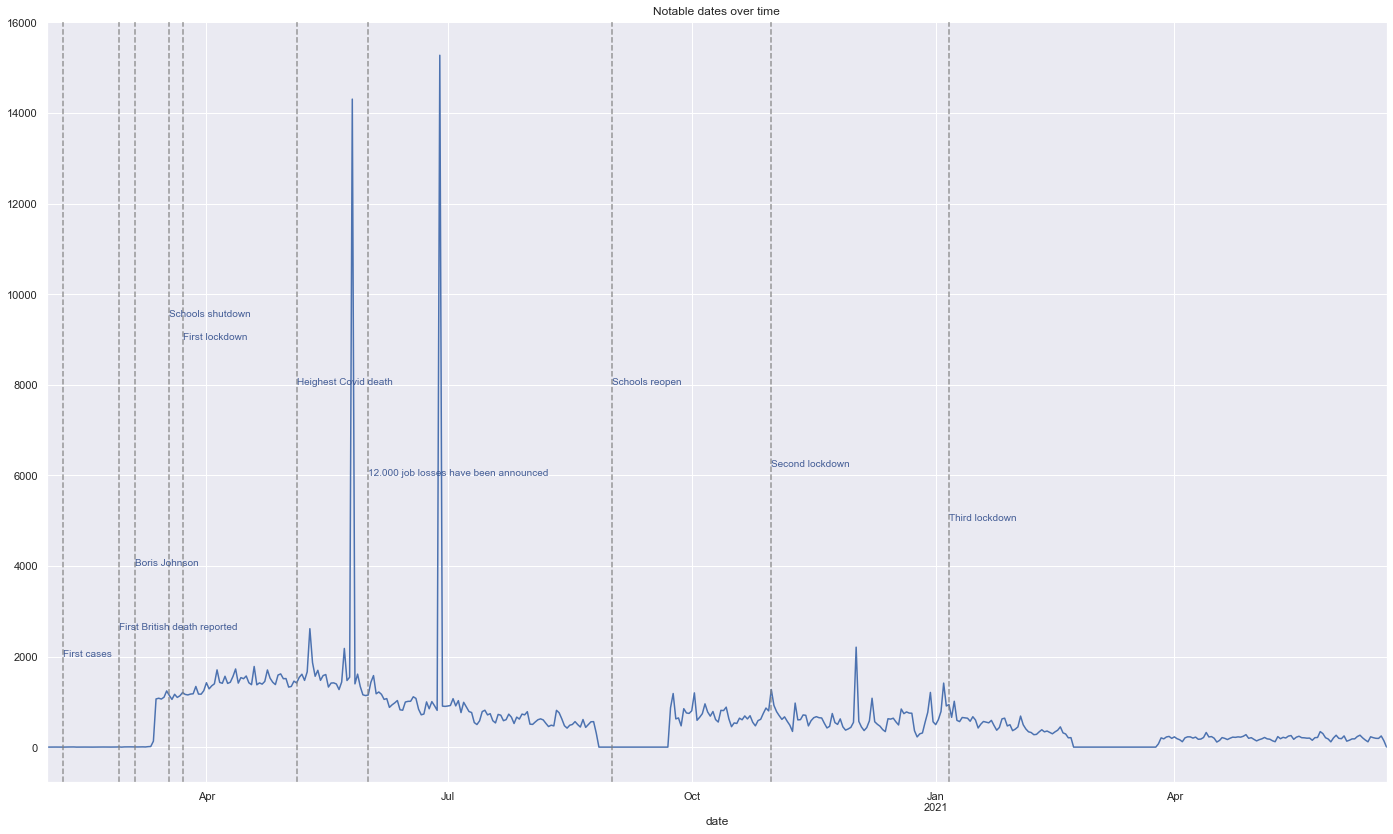

In [79]:
notable_dates = [
    ('2020-02-07', 2000, "First cases"),
    ('2020-02-28', 2600, "First British death reported"),
    ('2020-03-05', 4000, "Boris Johnson"),
    ('2020-03-18', 9500, "Schools shutdown"),
    ('2020-03-23', 9000, "First lockdown"),
    ('2020-05-05', 8000, "Heighest Covid death"),
    ('2020-06-01', 6000, "12.000 job losses have been announced"),
    ('2020-09-01', 8000, "Schools reopen"),
    ('2020-10-31', 6200, "Second lockdown"),
    ('2021-01-06', 5000, "Third lockdown"),
]

# plot the data subsetting from February 2020 to the end of the dataset
tweet_df_1day.loc['2020-02-01':].plot(figsize=(24,14))

# for each date in notable_dates, plot a vertical line

for x in notable_dates:
    plt.axvline(x[0], color='grey', alpha=0.8, ls= '--')
    plt.text(x=x[0], y=x[1], s=x[2], alpha=0.9, color='#334f8d')


plt.title('Notable dates over time');

## Unigrams and Bigrams

In [70]:
#dropping nan values that is string;
df.dropna(subset=["cleaned_text"], inplace=True)
df = df.loc[~(df["cleaned_text"] == "nan")]

df.head()

,user_name,created_at,text,favorite_count,retweet_count,cleaned_text,negative,neutral,positive,compound,vader_score,text_len,text_word_count,date
0,25446,Fri Mar 26 18:45:39 +0000 2021,"@BBCBreakfast A year ago, why did Chris Smith ...",0,0,A year ago why did Chris Smith describe Covid1...,0.052,0.880,0.068,0.1648,1,189,39,2021-03-26 18:45:39+00:00
1,20682,Fri Mar 26 18:47:04 +0000 2021,"""In time for Holy Week... hurrah! Oh. Wait... ...",7,1,In time for Holy Week hurrah Oh Wait but we pl...,0.000,0.946,0.054,0.3182,1,210,41,2021-03-26 18:47:04+00:00
2,59117,Fri Mar 26 18:45:21 +0000 2021,🤣🤣🤣🤣🤣 where do they make this shite up from ht...,0,0,where do they make this shite up from,0.000,1.000,0.000,0.0000,0,37,8,2021-03-26 18:45:21+00:00
3,43225,Fri Mar 26 18:47:17 +0000 2021,They’re just throwing darts at maps now 😴 http...,0,0,They’re just throwing darts at maps now,0.000,1.000,0.000,0.0000,0,39,7,2021-03-26 18:47:17+00:00
4,7575,Fri Mar 26 18:52:09 +0000 2021,So Grateful to receive my 1st vaccinated! @we...,14,0,So Grateful to receive my 1st vaccinated being...,0.000,0.732,0.268,0.5095,1,76,10,2021-03-26 18:52:09+00:00


In [71]:
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
np.random.seed(0)

In [72]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [73]:
# Getting top 50 unigrams
unigrams = get_top_n_words(df['cleaned_text'].astype(str),50)     ## Even astype(str) would work

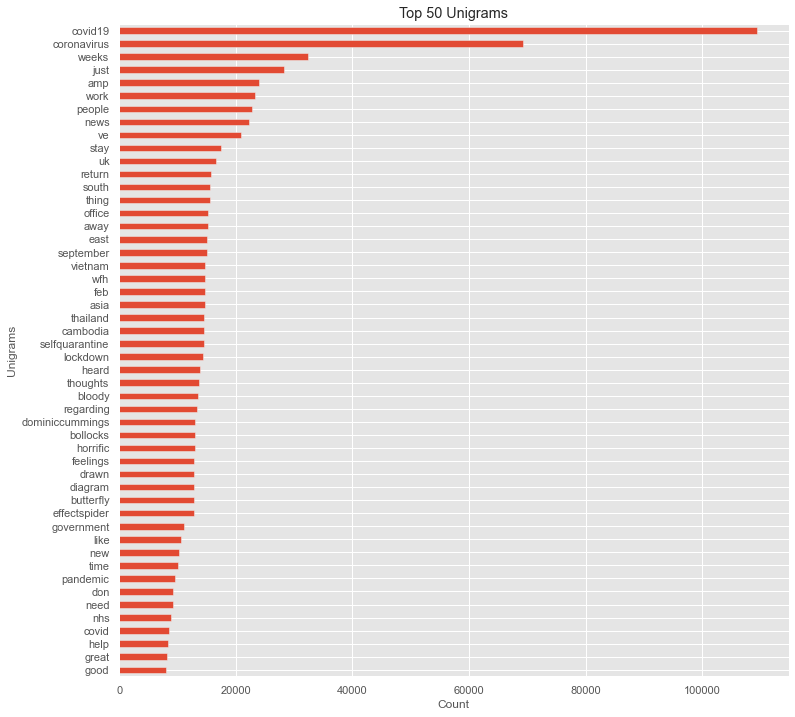

In [74]:
# Visualizing top 50 unigrams
df_uni = pd.DataFrame(unigrams, columns = ['text' , 'count'])

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,12))
df_uni.groupby('text').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax);
ax.set_xlabel('Count')
ax.set_ylabel('Unigrams')
ax.set_title('Top 50 Unigrams')
plt.savefig('unigram.png', dpi=300)
plt.show()


In [75]:
pos = df[df['vader_score']== 1]
neg = df[df['vader_score']== -1]
neutral = df[df['vader_score']== 0]

In [76]:
pos_unigrams = get_top_n_words(pos['cleaned_text'].astype(str),20)
neg_unigrams = get_top_n_words(neg['cleaned_text'].astype(str),20)
neutral_unigrams = get_top_n_words(neutral['cleaned_text'].astype(str),20)

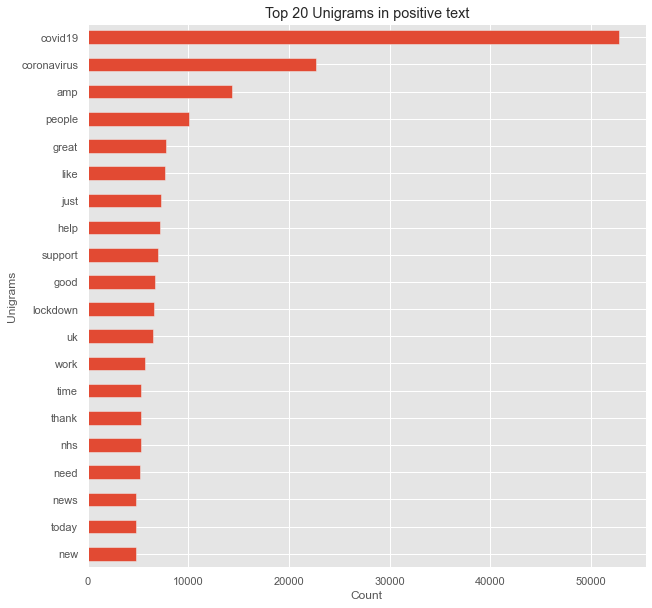

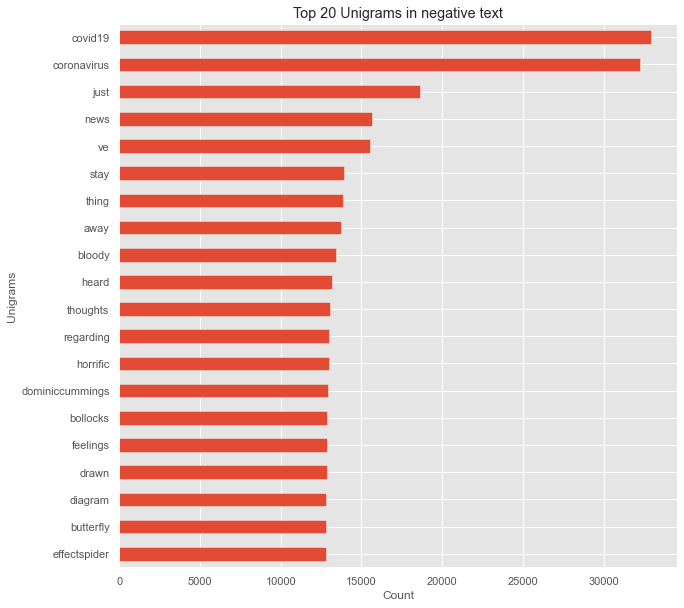

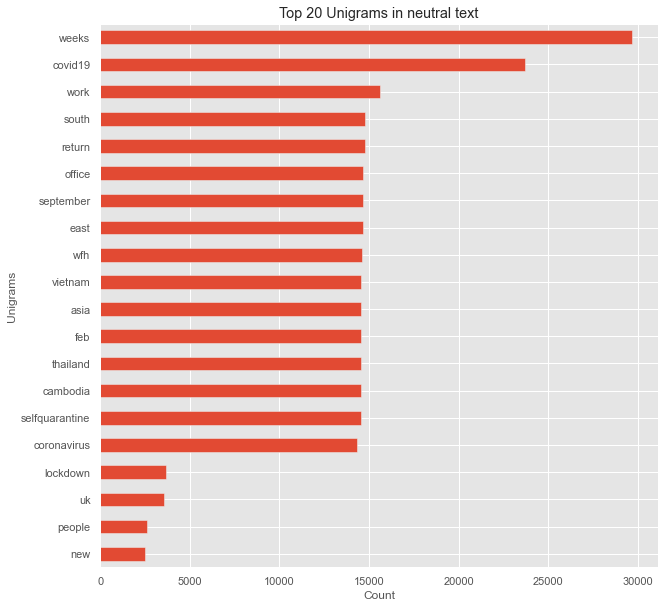

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
df1 = pd.DataFrame(pos_unigrams, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Unigrams')
ax.set_title('Top 20 Unigrams in positive text')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
df2 = pd.DataFrame(neg_unigrams, columns = ['text' , 'count'])
df2.groupby('text').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Unigrams')
ax.set_title('Top 20 Unigrams in negative text')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
df3 = pd.DataFrame(neutral_unigrams, columns = ['text' , 'count'])
df3.groupby('text').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Unigrams')
ax.set_title('Top 20 Unigrams in neutral text')
plt.show()


### Bigrams

In [77]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [78]:
bigrams = get_top_n_gram(df['cleaned_text'].astype(str),(2,2),50)

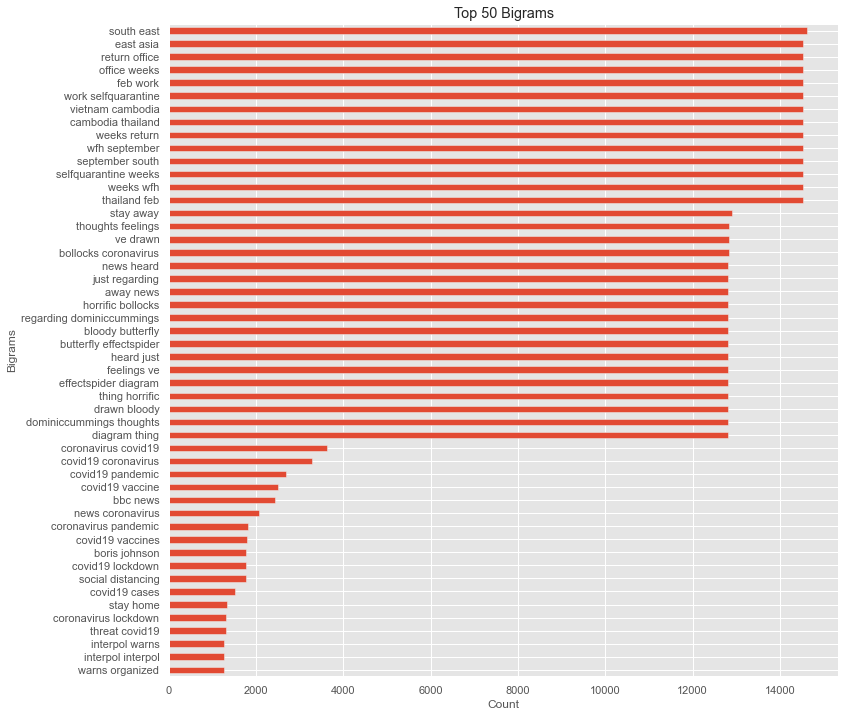

In [79]:
fig, ax = plt.subplots(figsize=(12,12))
df_bigram = pd.DataFrame(bigrams, columns = ['text' , 'count'])
df_bigram.groupby('text').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax);
ax.set_xlabel('Count')
ax.set_ylabel('Bigrams')
ax.set_title('Top 50 Bigrams')
plt.savefig('bigram.png', dpi=300)
plt.show()

In [80]:
pos_bigrams = get_top_n_gram(pos['cleaned_text'].astype(str),(2,2),20)
neg_bigrams = get_top_n_gram(neg['cleaned_text'].astype(str),(2,2),20)
neutral_bigrams = get_top_n_gram(neutral['cleaned_text'].astype(str),(2,2),20)


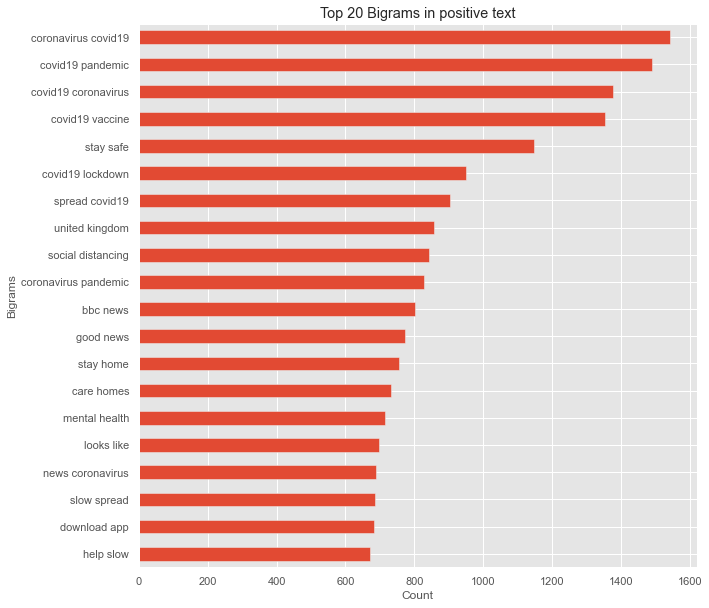

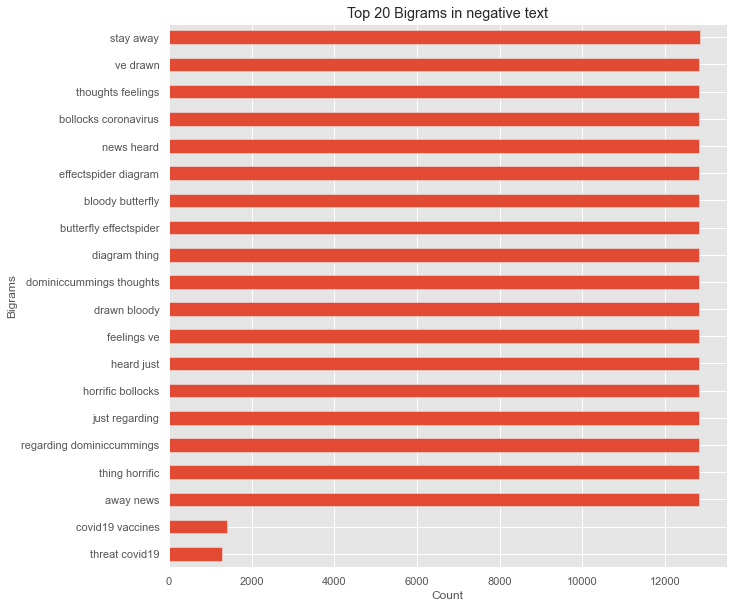

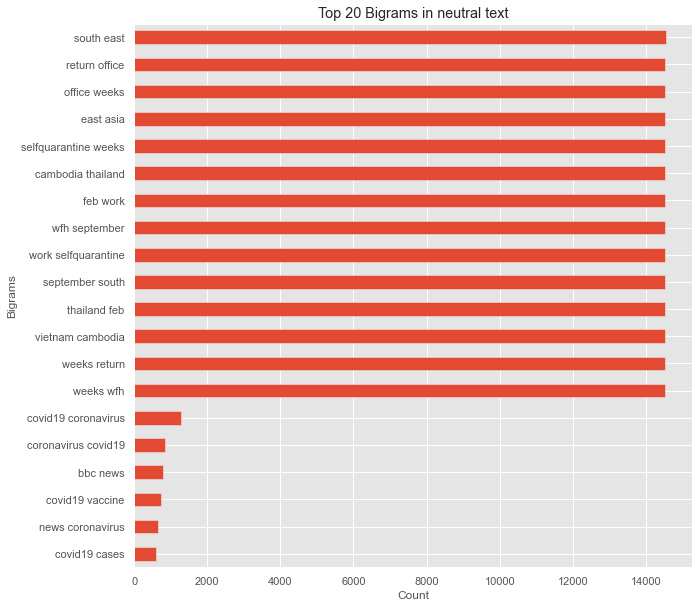

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
df1 = pd.DataFrame(pos_bigrams, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Bigrams')
ax.set_title('Top 20 Bigrams in positive text')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
df2 = pd.DataFrame(neg_bigrams, columns = ['text' , 'count'])
df2.groupby('text').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Bigrams')
ax.set_title('Top 20 Bigrams in negative text')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
df3 = pd.DataFrame(neutral_bigrams, columns = ['text' , 'count'])
df3.groupby('text').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Bigrams')
ax.set_title('Top 20 Bigrams in neutral text')
plt.show()

### Trigrams

In [82]:
trigrams = get_top_n_gram(df['cleaned_text'].astype(str),(3,3),20)

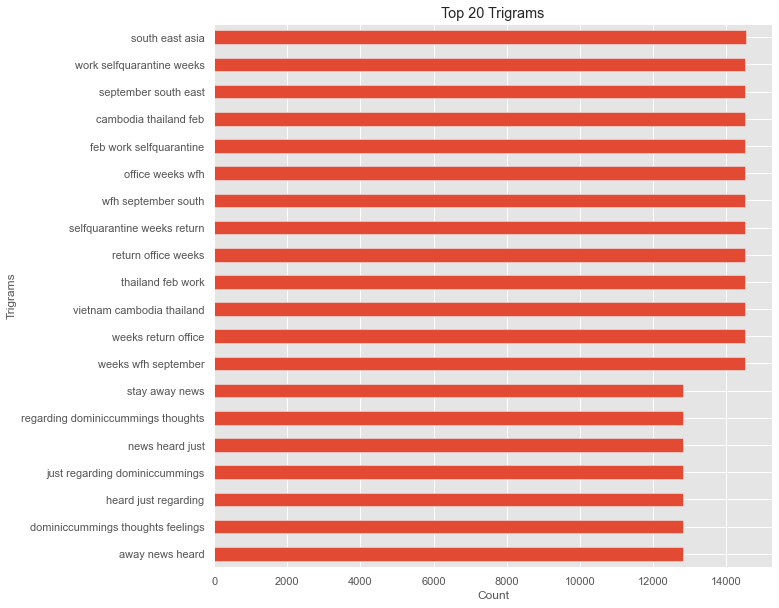

In [83]:
df_trigrams = pd.DataFrame(trigrams, columns = ['text' , 'count'])

fig, ax = plt.subplots(figsize=(10,10))
df_trigrams.groupby('text').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax);
ax.set_xlabel('Count')
ax.set_ylabel('Trigrams')
ax.set_title('Top 20 Trigrams')
plt.show()


In [84]:
pos_trigrams = get_top_n_gram(pos['cleaned_text'].astype(str),(3,3),20)
neg_trigrams = get_top_n_gram(neg['cleaned_text'].astype(str),(3,3),20)
neutral_trigrams = get_top_n_gram(neutral['cleaned_text'].astype(str),(3,3),20)

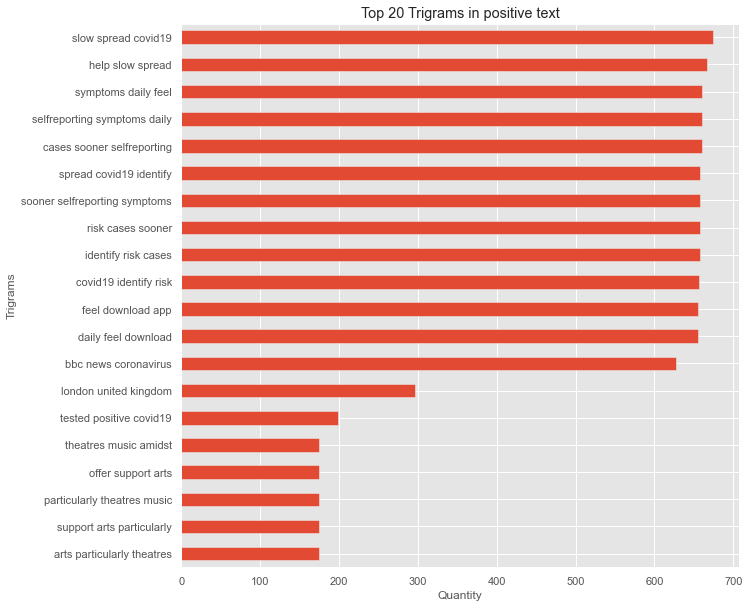

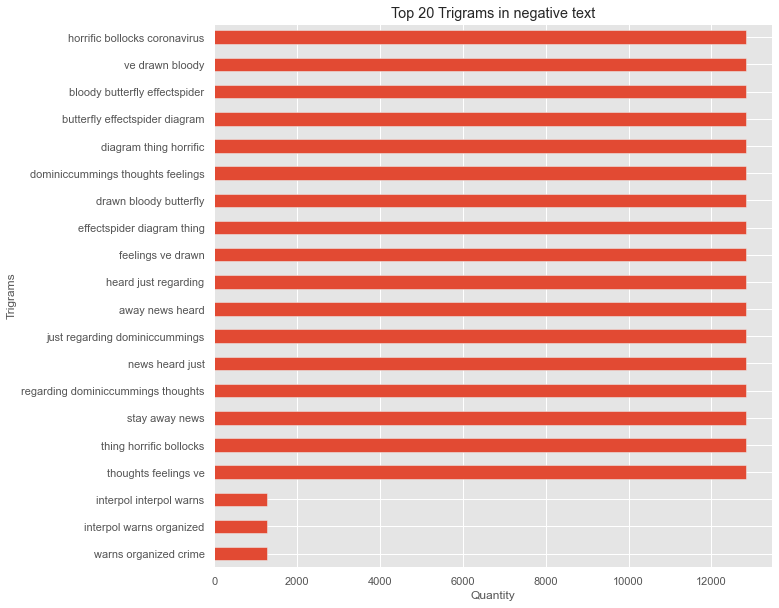

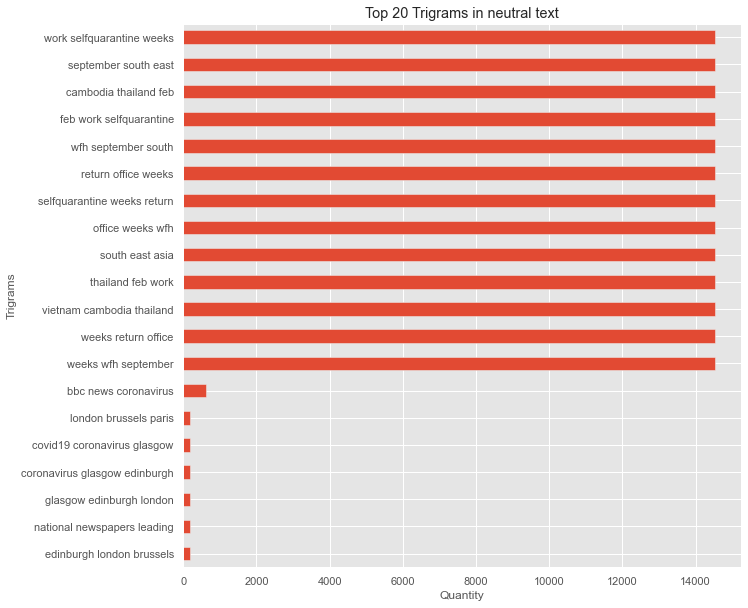

In [85]:
fig, ax = plt.subplots(figsize=(10,10))
df1 = pd.DataFrame(pos_trigrams, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax)
ax.set_xlabel('Quantity')
ax.set_ylabel('Trigrams')
ax.set_title('Top 20 Trigrams in positive text')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
df2 = pd.DataFrame(neg_trigrams, columns = ['text' , 'count'])
df2.groupby('text').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax)
ax.set_xlabel('Quantity')
ax.set_ylabel('Trigrams')
ax.set_title('Top 20 Trigrams in negative text')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
df3 = pd.DataFrame(neutral_trigrams, columns = ['text' , 'count'])
df3.groupby('text').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax)
ax.set_xlabel('Quantity')
ax.set_ylabel('Trigrams')
ax.set_title('Top 20 Trigrams in neutral text')
plt.show()

## Text Statistics

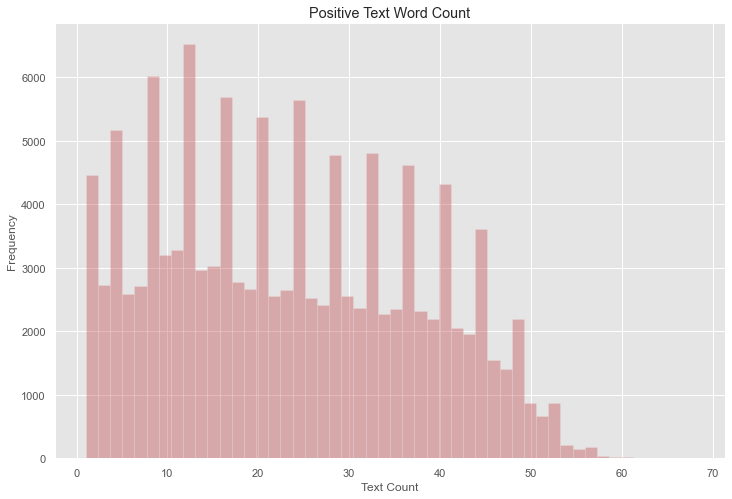

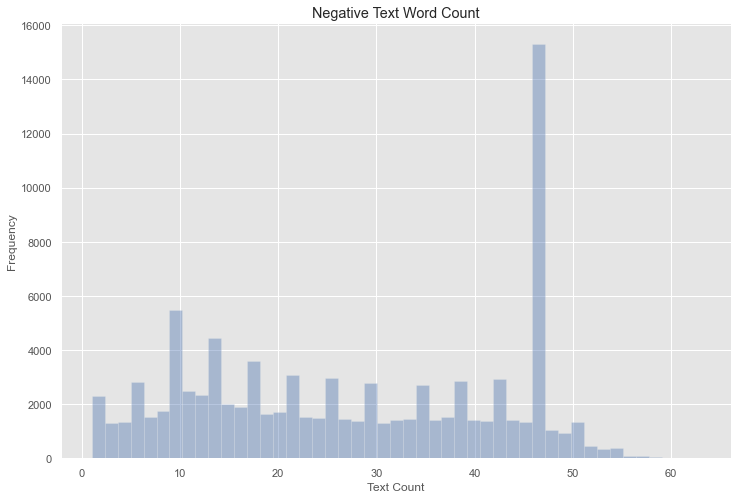

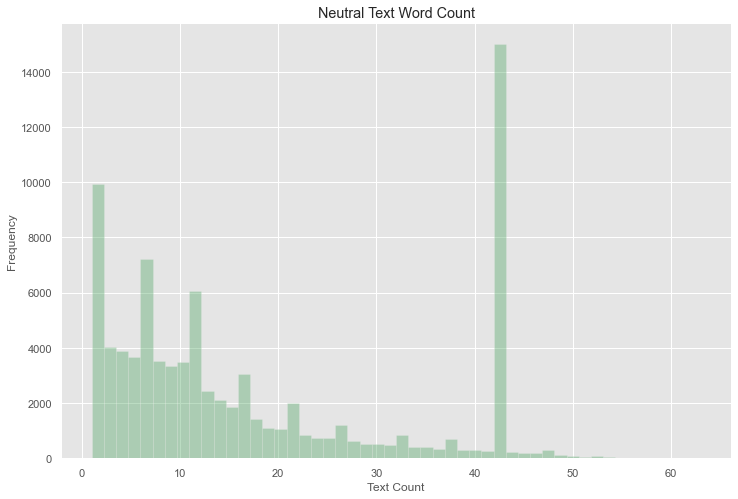

In [86]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.set_color_codes()
ax = sns.distplot(pos['text_word_count'], color="r", kde=False)
ax.set(title = 'Positive Text Word Count', xlabel = 'Text Count', ylabel = 'Frequency');

plt.figure(figsize=(12,8))
ax = sns.distplot(neg['text_word_count'], color="b", kde=False)
ax.set(title = 'Negative Text Word Count', xlabel = 'Text Count', ylabel = 'Frequency');

plt.figure(figsize=(12,8))
ax = sns.distplot(neutral['text_word_count'], color="g", kde=False)
ax.set(title = 'Neutral Text Word Count', xlabel = 'Text Count', ylabel = 'Frequency');

### Sentence length analysis

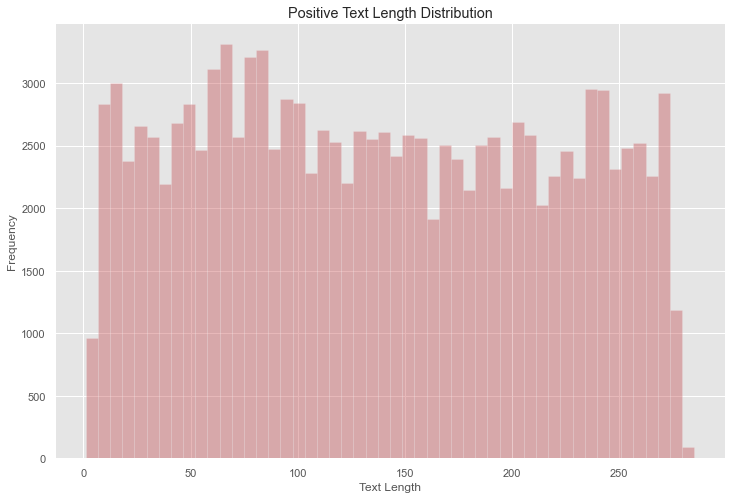

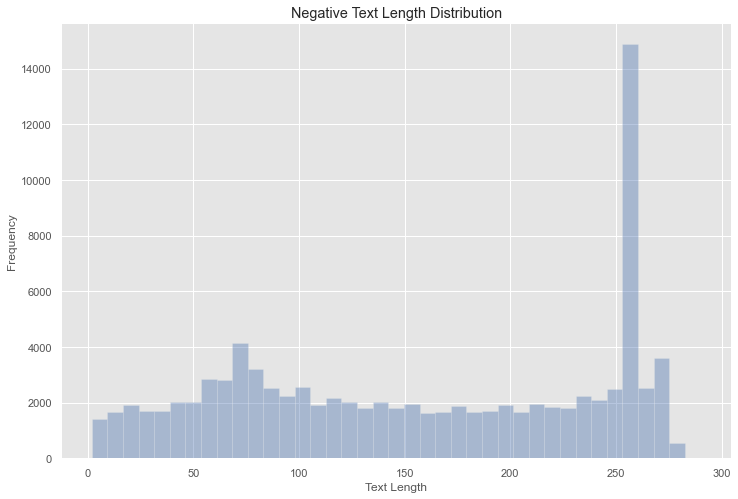

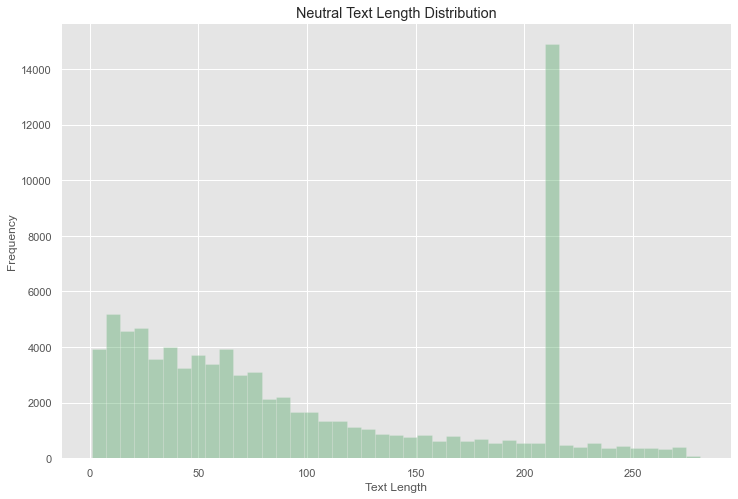

In [87]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.set_color_codes()
ax = sns.distplot(pos['text_len'], color="r", kde=False)
ax.set(title = 'Positive Text Length Distribution', xlabel = 'Text Length', ylabel = 'Frequency');

plt.figure(figsize=(12,8))
ax = sns.distplot(neg['text_len'], color="b", kde=False)
ax.set(title = 'Negative Text Length Distribution', xlabel = 'Text Length', ylabel = 'Frequency');

plt.figure(figsize=(12,8))
ax = sns.distplot(neutral['text_len'], color="g", kde=False)
ax.set(title = 'Neutral Text Length Distribution', xlabel = 'Text Length', ylabel = 'Frequency');


## WordClouds

In [88]:
#!pip install wordcloud

In [89]:
positive_text = df[df['vader_score'] == 1]['cleaned_text']
negative_text = df[df['vader_score'] == -1]['cleaned_text'].astype(str)
neutral_text = df[df['vader_score'] == 0]['cleaned_text'].astype(str)

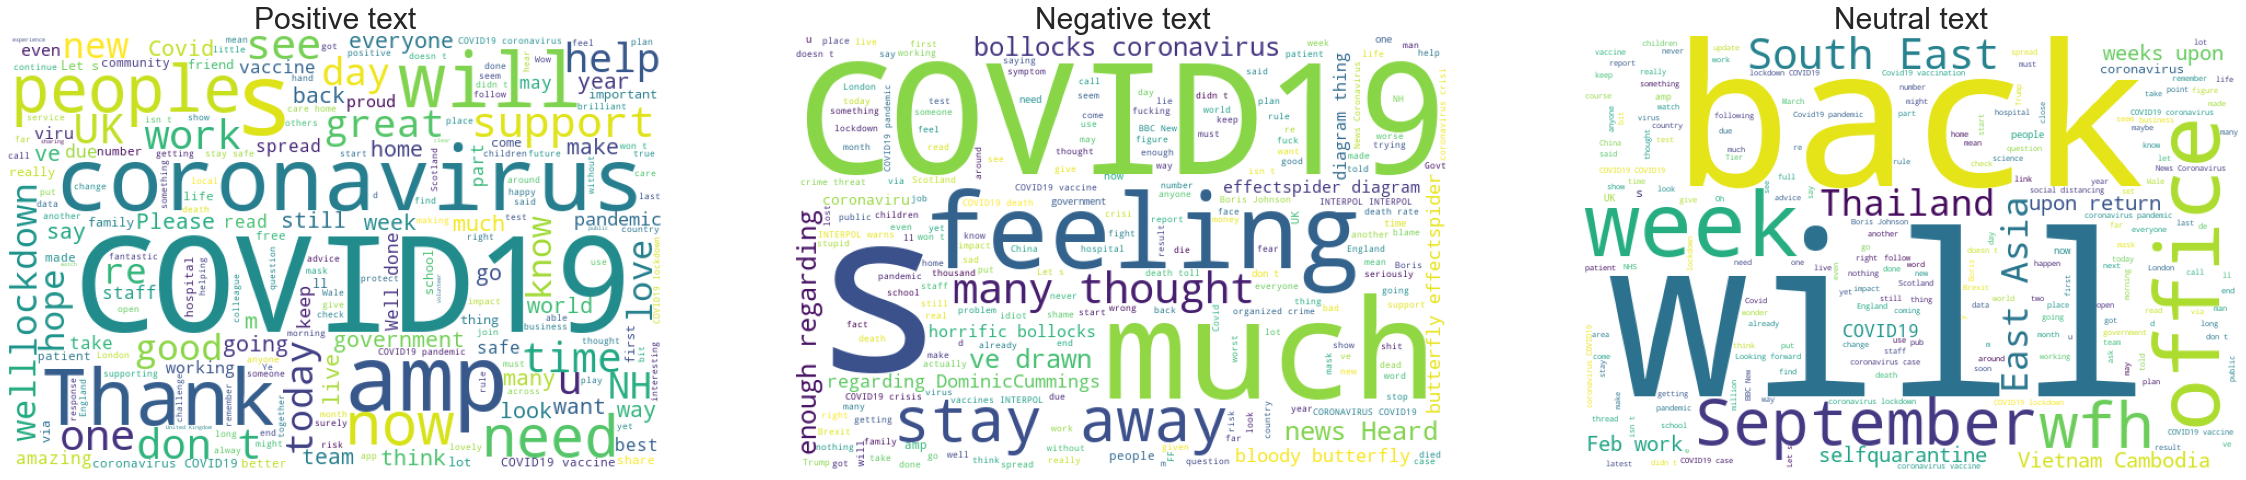

In [94]:
from wordcloud import WordCloud
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[40, 25])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(positive_text))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive text',fontsize=30);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(negative_text))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative text',fontsize=30);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(neutral_text))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral text',fontsize=30);

# Natural Language Processing

## Data preparation

In [50]:
#extension = 'csv'
#all_filenames = [i for i in glob.glob('data_selected/*.{}'.format(extension))]

#combine all files in the list
#data_selected = pd.concat([pd.read_csv(f) for f in all_filenames ])

#export to csv
#data_selected.to_csv( "scored_data.csv", index=False, encoding='utf-8-sig')

In [ ]:
#!pip install spacy
#!pip install spacy-transformers

In [80]:
import pandas as pd

df = pd.read_csv('selected_data.csv', encoding='utf-8', )
df.head()

,scores,user_name,created_at,text,cleaned_text
0,1,49936,Mon Mar 29 08:44:47 +0000 2021,"Today we start to unlock slowly , any slight c...","Today we start to unlock slowly , any slight c..."
1,-1,9690,Mon Mar 29 09:04:10 +0000 2021,Last chance to vote today for our freedom! Che...,Last chance to vote today for our freedom! Che...
2,1,25997,Mon Mar 29 07:09:53 +0000 2021,Fantastic news. Young people to experience vit...,Fantastic news. Young people to experience vit...
3,-1,30182,Mon Mar 29 09:01:49 +0000 2021,'We envy you Britain!' Iain Duncan Smith mocks...,'We envy you Britain!' Iain Duncan Smith mocks...
4,-1,17263,Mon Mar 29 08:07:14 +0000 2021,Laughable loopholes - and in Scotland too - ye...,Laughable loopholes - and in Scotland too - ye...


In [81]:
#selecting required columns;
df = df[["cleaned_text", "scores"]]

#dropping nan values that is string;
df.dropna(subset=["cleaned_text"], inplace=True)
df = df.loc[~(df["cleaned_text"] == "nan")]

df.head()

,cleaned_text,scores
0,"Today we start to unlock slowly , any slight c...",1
1,Last chance to vote today for our freedom! Che...,-1
2,Fantastic news. Young people to experience vit...,1
3,'We envy you Britain!' Iain Duncan Smith mocks...,-1
4,Laughable loopholes - and in Scotland too - ye...,-1


### Data Augmentation

In [82]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from textaugment import Wordnet
augmenter = Wordnet()


# applying augmentation to positive and negative text to improve model accuracy;
def augment_text(text):
    return augmenter.augment(text)

positive_text = df.loc[df["scores"] == 1]["cleaned_text"].values
positive_augmented = [augment_text(text) for text in positive_text if len(text) > 7]
df_pos = pd.DataFrame({"cleaned_text": positive_augmented})
df_pos["scores"] = 1

negative_text = df.loc[df["scores"] == -1]["cleaned_text"].values
negative_augmented = [augment_text(text) for text in negative_text if len(text) > 7]
df_neg = pd.DataFrame({"cleaned_text": negative_augmented})
df_neg["scores"] = -1


#concat all dataframe as df;
df = pd.concat([df, df_pos, df_neg], axis=0)
print(df.scores.value_counts(normalize=True))

[nltk_data] Downloading package punkt to /Users/sifatok/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sifatok/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sifatok/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
-1    0.421538
 0    0.300513
 1    0.277949
Name: scores, dtype: float64


### Spacy Classicification

In [133]:
# spacy classifation
import spacy
from tqdm.auto import tqdm
from spacy.tokens import DocBin

nlp = spacy.load("en_core_web_lg")


In [134]:
print(df.scores.value_counts(normalize=True))


-1    0.421538
 0    0.300513
 1    0.277949
Name: scores, dtype: float64


In [135]:
def make_docs(data):
    """
    this will take a list of texts and labels 
    and transform them in spacy documents
    
    data: list(tuple(text, label))
    
    returns: List(spacy.Doc.doc)
    """
    
    docs = []
    # nlp.pipe([texts]) is way faster than running 
    # nlp(text) for each text
    # as_tuples allows us to pass in a tuple, 
    # the first one is treated as text
    # the second one will get returned as it is.
    
    for doc, label in tqdm(nlp.pipe(data, as_tuples=True), total = len(data)):
        
        # we need to set the (text)cat(egory) for each document
        if label == 1:
            doc.cats["positive"] = 1
            doc.cats["negative"] = 0
            doc.cats["neutral"] = 0
        elif label == 0:
            doc.cats["positive"] = 0
            doc.cats["negative"] = 0
            doc.cats["neutral"] = 1
        else:
            doc.cats["positive"] = 0
            doc.cats["negative"] = 1
            doc.cats["neutral"] = 0
        
        # put them into a nice list
        docs.append(doc)
    
    return docs


label_mapping = {
    -1: "neg",
    0: "neu",
    1: "pos",
}
# df["label"] = df["scores"].apply(lambda x: label_mapping.get(x))
df["label"] = df["scores"]
df["cleaned_text"] = df["cleaned_text"].astype(str)
# text_data = list(df[["cleaned_text", "label"]].to_records(index=False))

from sklearn.model_selection import train_test_split

df_train, df_validate = train_test_split(df[["cleaned_text", "label"]], test_size=0.2, random_state = 42)

train_data = list(df_train.to_records(index=False))
valid_data = list(df_validate.to_records(index=False))


train_docs = make_docs(train_data)

# then we save it in a binary file to disc
doc_bin = DocBin(docs=train_docs)
doc_bin.to_disk("./data/train.spacy")

# repeat for validation data
valid_docs = make_docs(valid_data)
doc_bin = DocBin(docs=valid_docs)
doc_bin.to_disk("./data/valid.spacy")

In [136]:
!python -m spacy init fill-config base_config.cfg config.cfg

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [137]:
!python -m spacy train config.cfg --output ./output

ℹ Using CPU

=========================== Initializing pipeline ===========================
[2021-07-02 16:24:47,271] [INFO] Set up nlp object from config
[2021-07-02 16:24:47,288] [INFO] Pipeline: ['tok2vec', 'textcat']
[2021-07-02 16:24:47,293] [INFO] Created vocabulary
[2021-07-02 16:24:50,401] [INFO] Added vectors: en_core_web_lg
[2021-07-02 16:24:50,401] [INFO] Finished initializing nlp object
[2021-07-02 16:24:53,946] [INFO] Initialized pipeline components: ['tok2vec', 'textcat']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ------------  ----------  ------
  0       0          0.00          0.03        0.00    0.00
  0     200          1.91         16.60       18.13    0.18
  0     400          1.68         10.35       23.00    0.23
  1     600          1.75          4.85      

In [212]:
# load thebest model from training
nlp = spacy.load("output/model-best")
texts = [
    ("negative", "It is terrible to hear there are many covid cases"),
    ("neutral", "Researchers work in a vaccine."),
    ("positive", "Finally, lockdown rules are easing down and people going back to normal life."),
] 

for text in texts:
    print(f"This is a {text[0]} text: {text[1]}")
    doc = nlp(text[1])
    print(doc.cats['positive'])
    print(doc.cats['negative'])
    print(doc.cats['neutral'])

This is a negative text: It is terrible to hear there are many covid cases
0.06460662931203842
0.9250243306159973
0.010369022376835346
This is a neutral text: Researchers work in a vaccine.
0.17357487976551056
0.12566979229450226
0.7007553577423096
This is a positive text: Finally, lockdown rules are easing down and people going back to normal life.
0.21758899092674255
0.20821526646614075
0.5741957426071167


In [170]:
def get_model_score(text):
    doc = nlp(text)
    results = {
        "pos": "{:.3f}".format(doc.cats['positive']),
        "neg": "{:.3f}".format(doc.cats['negative']),
        "neu": "{:.3f}".format(doc.cats['neutral']),
    }
    return results

df_v = df_validate.copy(deep=True)
pd.set_option('display.max_columns', None)
df_v["model_score"] = df_v["cleaned_text"].apply(get_model_score)
df_v.head()

,cleaned_text,label,model_score
1320,A reminder of what the Uk would look like if t...,0,"{'pos': '0.000', 'neg': '0.000', 'neu': '1.000'}"
1712,"Microstates, island nations and overseas terri...",0,"{'pos': '0.000', 'neg': '0.000', 'neu': '1.000'}"
236,You’d better hope that the vaccine hasn’t crea...,0,"{'pos': '1.000', 'neg': '0.000', 'neu': '0.000'}"
1839,Invermectin is not unproven,0,"{'pos': '0.018', 'neg': '0.006', 'neu': '0.976'}"
1001,Absolutely mortified to be from belfast rn. Ca...,-1,"{'pos': '0.000', 'neg': '1.000', 'neu': '0.000'}"


In [51]:
#df_v.loc[df_v["label"] == -1].head(50)

## Machine Learning Models

In [134]:
df = pd.read_csv('selected_data.csv')

In [135]:
#selecting required columns;
df = df[["cleaned_text", "scores"]]

#dropping nan values that is string;
df.dropna(subset=["cleaned_text"], inplace=True)
df = df.loc[~(df["cleaned_text"] == "nan")]

df.head()

,cleaned_text,scores
0,"Today we start to unlock slowly , any slight c...",1
1,Last chance to vote today for our freedom! Che...,-1
2,Fantastic news. Young people to experience vit...,1
3,'We envy you Britain!' Iain Duncan Smith mocks...,-1
4,Laughable loopholes - and in Scotland too - ye...,-1


In [83]:
df.head()
#df.shape

,cleaned_text,scores
0,"Today we start to unlock slowly , any slight c...",1
1,Last chance to vote today for our freedom! Che...,-1
2,Fantastic news. Young people to experience vit...,1
3,'We envy you Britain!' Iain Duncan Smith mocks...,-1
4,Laughable loopholes - and in Scotland too - ye...,-1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 615
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cleaned_text  2925 non-null   object
 1   scores        2925 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [85]:
# Removing emojis and URLs;

def remove_emojis(text):
    import re
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

In [86]:
# Define text processing function

def preprocess(text):
    import re, string
    
    text = text.replace('(<br/>)', ' ')
    text = text.replace('(&amp)', ' ')
    text = text.replace('(&gt)', ' ')
    text = text.replace('(&lt)', ' ')
    text = text.replace('(\xa0)', ' ')
    text = text.replace(r'\n',' ',)
    text = text.replace(r'#',' ',)
    text = text.replace('"',' ',)
    text = text.replace("'",' ',)
    
    # Remove URL
    text = re.sub(r"(?:\@|http?\://|https?\://|www.)\S+", "", text)
    
    # Remove emoji
    text = remove_emojis(text)
    
    # Remove punctuation
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    
    # Remove white space
    text = " ".join(text.split())
    
    return text

In [87]:
#df['cleaned_text'].fillna('unknown',inplace=True)

In [88]:
X = df.cleaned_text
y = df.scores
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [89]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape[0], test_vectors.shape[0])

2340 585


### Building a classifier

In [90]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [47]:
#select_text = df.loc[df['cleaned_text'] == 'Lableak extremely unlikely WHO says COVID19 probably passed from bats to humans'].index
#df.drop(select_text, axis=0, inplace=True)

The rest is same as count vectorizer, TFIDF vectorizer will calculate these scores for terms in documents, and convert textual data into the numeric form.


### Grid Search Cross-Validation and Best-Fit Paramters

In [91]:
# plot confusion matrix
def plot_con_matrix(labels, predictions, normalize=False, cmap='Spectral'):
    
    import pandas as pd
    import numpy as np
    import itertools
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(labels, predictions)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, [0, 1, -1], [0, 1, -1])
    sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt='g', cmap=cmap)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
#plot roc curve    
def plot_roc_curve(labels, predictions, y_score):
    
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    import seaborn as sns
    
    fpr, tpr, thresholds = roc_curve(labels, y_score)
    print('AUC: {}'.format(auc(fpr, tpr, npr)))
    #Seaborns Beautiful Styling
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(fpr, tpr, npr, color='darkorange',
             lw=lw, label='ROC curve')
    plt.plot([0, 1, -1], [0, 1, -1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

### Decision Tree Classifier

In [92]:
# Defining gridsearch parameters
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2 ,3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [93]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')  
dtc.fit(train_vectors, y_train) 


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [94]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dtc, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(train_vectors, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [95]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(test_vectors, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
params = dt_grid_search.best_params_
params

Mean Training Score: 38.31%
Mean Test Score: 70.60%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

              precision    recall  f1-score   support

          -1       0.76      0.81      0.79       247
           0       0.65      0.59      0.62       176
           1       0.81      0.80      0.80       162

    accuracy                           0.74       585
   macro avg       0.74      0.74      0.74       585
weighted avg       0.74      0.74      0.74       585



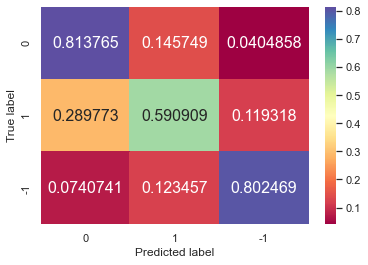

In [96]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion = 'gini',
                            max_depth = None,
                            max_features = 'auto',
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            splitter = 'random',
                            random_state = 33,
                            class_weight='balanced')  
dtc.fit(train_vectors, y_train) 

# Predicted values
y_pred = dtc.predict(test_vectors)
print(classification_report(y_test, y_pred))

plot_con_matrix(y_test,y_pred, normalize=True, cmap='Spectral')

"Precision" (also called Positive Predictive Value) tells you what proportion of data predicted as positive actually is positive. In other words, the proportion of True Positive in the set of all positive predicted data.

"Recall" (also called Sensitivity, Hit Rate, True Positive Rate) tells you what proportion of data that actually is positive were predicted positive. In other words, the proportion of True Positive in the set of all actual positive data.

And finally, the F1 score is the harmonic mean of precision and recall. The harmonic mean is a specific type of average, which is used when dealing with averages of units, like rates and ratios. So by calculating the harmonic mean of the two metrics, it will give you a good idea of how the model is performing both in terms of precision and recall. The formula is as below

True Negatives is the number of correct classifications of the 0/No.

False Negatives is the number of incorrect classifications 0/No.

False Positives is the number of incorrect classifications of the 1/Yes.

True Positives is the number of correct classifications of the 1/Yes.

### Random Forest Classifier

              precision    recall  f1-score   support

          -1       0.75      0.94      0.83       370
           0       0.76      0.62      0.68       264
           1       0.93      0.78      0.85       244

    accuracy                           0.80       878
   macro avg       0.82      0.78      0.79       878
weighted avg       0.81      0.80      0.79       878



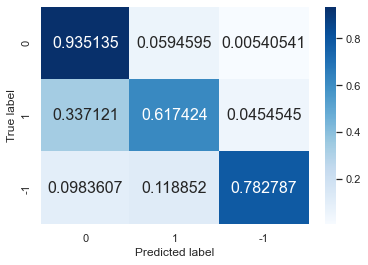

In [191]:
# RandomForest 
rfc = RandomForestClassifier(random_state=33, class_weight='balanced')

rfc.fit(train_vectors, y_train) 

# Predicted values
y_pred = rfc.predict(test_vectors)

# Print accuracy report and confusion matrix
print(classification_report(y_test, y_pred))
plot_con_matrix(y_test,y_pred, normalize=True, cmap=plt.cm.Blues)

In [193]:
# Defining gridsearch parameters
rf_param_grid = {
    'n_estimators': [30, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4 ,5, 6],
    'min_samples_leaf': [2, 3, 4, 5, 6],
    'max_features':['auto', 'sqrt', 'log2'],
    'random_state':[33]
}

In [195]:

rf_grid_search = GridSearchCV(rfc, rf_param_grid, cv=3)
rf_grid_search.fit(train_vectors, y_train)

rf_gs_testing_score = rf_grid_search.score(test_vectors, y_test)


print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print(f"Mean Test Score: {rf_gs_testing_score :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 68.39%
Mean Test Score: 75.17%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 33}


              precision    recall  f1-score   support

          -1       0.76      0.85      0.80       370
           0       0.65      0.64      0.64       264
           1       0.87      0.72      0.79       244

    accuracy                           0.75       878
   macro avg       0.76      0.74      0.74       878
weighted avg       0.76      0.75      0.75       878



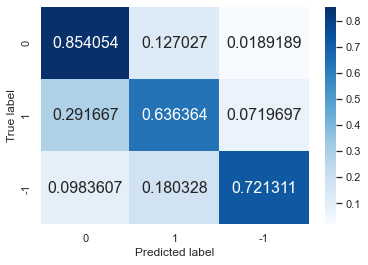

In [196]:
# Modelling the data
rfc = RandomForestClassifier(criterion = 'gini',
                             max_depth = None,
                             min_samples_leaf = 2, 
                             min_samples_split = 2,
                             n_estimators = 150,
                             random_state=33, 
                             class_weight='balanced')

rfc.fit(train_vectors, y_train) 

# Predicted values
y_pred = rfc.predict(test_vectors)

# Print accuracy report
print(classification_report(y_test, y_pred))
plot_con_matrix(y_test,y_pred, normalize=True, cmap=plt.cm.Blues)

From the above classification reports, we can see that model has slightly higher precision in positive class and higher recall in negative class. But this averages out by calculating the F1 score, and for both classes, we get the almost same F1 score for both positive and negative class. 

There is also a way to visualise the model performance by plotting ROC curve, but I will explain more in detail later.

# Further Study


Is there any correlation between each of these search terms, or do they operate separately? In other words, is someone who searches for a word like "depression" more likely to search for a related word like "anxiety"?
Analysis comparing search relevance with BLM? What about other social movements in the past? Do social movements increase or decrease the relevance of these search terms?

# References 

For Time series;

https://machinelearningmastery.com/time-series-data-stationary-python/

https://learn.datacamp.com/

For sentiment analysis;

https://spacy.io/

https://www.kaggle.com/gauravduttakiit/twitter-sentiment-analysis-nlp

http://www.panacealab.org/covid19/

For Modelling;

https://pypi.org/project/textaugment/

https://medium.com/analytics-vidhya/nlp-getting-started-with-sentiment-analysis-126fcd61cc4a

https://learn.co/